# Check data & Label

In [ ]:
import pandas as pd, os, tqdm, warnings
import numpy as np

warnings.filterwarnings('ignore')

'''
    * 모든환자 데이터 다 붙여서 한 파일로 만들기 
    
        (1) dir1 : 1-002~1-021 (csv file format)

        (2) dir2 : 1-022~1-089 (Excel file format)

        (3) File List

            a. 라벨파일(Ventilator)
            b. Demographics
            c. Diagnosis
            d. Drug
            e. Heightandweight
            f. Lab
            g. Ventilator-parameter
            h. Vitalsigndat

'''

# 서울대 데이터 

* Label File (Weanings Success 여부 및 시점)

In [14]:
import pandas as pd, warnings

warnings.filterwarnings('ignore')

# Set file path
SNU_path = '/data/project/nia_vent/nia_vent_weaning/raw_data/서울대/'
dst_path = '/data/project/nia_vent/nia_vent_weaning/data/SNU/'
dir1 = '1-002~1-021'
# dir2 = '1-022~1-089'  # 90~379에 포함되어 있음
dir3 = '1-090~1-379'

df1 = pd.read_csv(SNU_path + dir1 + '/Ventilator.csv', encoding='cp949')
# df2 = pd.read_excel(SNU_path + dir2 + '/Ventilator.xlsx')
df3 = pd.read_excel(SNU_path + dir3 + '/Ventilator.xlsx')

In [9]:
# 2~21 patients
df1

,hospital_id,patient_id,hadm_id,mv_id,csv_file_path,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,1,2,1,snu_002,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,NaN,NaN,NaN,2021-09-23 18:00,2021-09-28 17:28,2021-09-23 17:58,2021-09-28 17:15,0
1,1,3,1,snu_003,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-08-28 12:25,NaN,2021-09-13 6:30,2021-08-28 12:35,2021-09-13 6:30,2021-08-28 12:23,2021-09-13 6:45,0
2,1,4,1,snu_004,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-07 11:46,NaN,2021-09-17 18:31,2021-09-07 11:46,2021-09-17 18:31,2021-09-14 10:18,2021-09-17 18:17,0
3,1,5,1,snu_005,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-09 13:56,2021-09-15 15:00,2021-09-15 15:00,2021-09-09 13:56,2021-10-01 13:46,2021-09-17 14:40,2021-10-01 1:42,0
4,1,6,1,snu_006,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-12 3:17,NaN,2021-09-23 10:49,2021-09-12 4:03,2021-09-23 10:49,2021-09-17 14:40,2021-09-23 10:49,0
5,1,7,1,snu_007,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-13 11:26,NaN,2021-09-18 15:00,2021-09-13 11:26,2021-09-18 15:00,2021-09-13 15:07,2021-09-18 14:49,0
6,1,8,1,snu_008,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-14 1:20,2021-09-28 14:50,2021-09-28 14:50,2021-09-14 1:21,2021-09-29 11:21,2021-09-17 14:40,2021-09-29 11:22,0
7,1,9,1,snu_009,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-16 8:40,2021-09-24 14:30,2021-09-24 14:30,2021-09-16 8:40,2021-10-04 21:32,2021-09-27 14:43,2021-10-04 21:33,0
8,1,10,1,snu_010,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-16 17:11,2021-09-30 10:18,2021-09-30 10:18,2021-09-16 17:11,2021-09-30 15:54,2021-09-17 14:41,2021-09-29 23:59,0
9,1,11,1,snu_011,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-23 10:46,NaN,2021-09-27 18:03,2021-09-23 10:48,2021-09-27 18:03,2021-09-23 10:48,2021-09-27 18:03,0


In [10]:
# 22 ~ 379

df3

,hospital_id,patient_id,hadm_id,mv_id,csv_file_path,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,1,22,1,SNU_022,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-10-05 13:45:00,NaT,2021-10-08 13:56:00,2021-10-05 13:45:00,2021-10-08 13:56:00,NaN,NaN,0
1,1,23,1,SNU_023,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-10-07 13:18:00,2021-10-08 14:19:00,NaT,2021-10-07 13:18:00,2021-10-10 10:07:00,NaN,NaN,0
2,1,24,1,SNU_024,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-10-09 10:08:00,2021-10-19 11:20:00,NaT,2021-10-09 11:15:00,2021-11-08 08:04:00,NaN,NaN,0
3,1,25,1,SNU_025,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-10-11 11:04:00,2021-10-19 11:50:00,NaT,2021-10-11 11:04:00,2021-11-03 13:46:00,NaN,NaN,0
4,1,26,1,SNU_026,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-10-05 20:09:00,NaT,2021-10-21 09:42:00,2021-10-05 20:23:00,2021-10-21 09:42:00,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1,375,1,SNU_375,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-03-30 12:55:00,NaT,2022-03-31 09:15:00,2022-03-30 12:55:00,2022-03-31 09:15:00,NaN,NaN,0
354,1,376,1,SNU_376,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-04-05 12:50:00,NaT,2022-04-06 09:30:00,2022-04-05 12:50:00,2022-04-06 09:30:00,NaN,NaN,0
355,1,377,1,SNU_377,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-04-26 13:10:00,NaT,2022-04-27 09:30:00,2022-04-26 13:10:00,2022-04-27 09:30:00,NaN,NaN,0
356,1,378,1,SNU_378,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-05-10 12:35:00,NaT,2022-05-11 11:20:00,2022-05-10 12:35:00,2022-05-11 11:20:00,NaN,NaN,0


In [12]:
label_df = pd.concat([df1, df3], axis=0).reset_index(drop=True)
label_df.to_csv(dst_path + 'label.csv')

* Input file

In [ ]:
# 서울대 데이터 중, Ventilator-parameter 변수 컬럼이 이상하게 되어있어서 수정하는 코드임.

dir1 = '1-002~1-021/'
dir2 = '1-022~1-089/'
dir3 = '1-090~1-379/'

tmp_df = pd.read_csv(SNU_path + dir1 + 'Ventilator-parameter.csv', encoding='cp949')
tmp_df['hospital_id'] = 1 # 서울대 기관번호는 1
tmp_df2 = pd.read_excel(SNU_path + dir2 + 'Ventilator-parameter.xlsx')
tmp_df3 = pd.read_excel(SNU_path + dir3 + 'Ventilator-parameter.xlsx')

tmp_df = tmp_df.dropna(subset=['parameter'])    # 값 없는 경우 drop
tmp_df = tmp_df[list(tmp_df2.keys())]             # tmp2 key 순서와 동일하게 맞추기

result_df = pd.concat([tmp_df, tmp_df2], axis=0)
result_df = pd.concat([tmp_df, tmp_df3], axis=0)
result_df['patient_id'] = result_df['patient_id'].astype(int)
result_df.to_csv(dst_path + 'Ventilator-parameter.csv')
result_df

In [3]:
import pandas as pd

# Set file path
SNU_path = '/data/project/nia_vent/nia_vent_weaning/raw_data/서울대/'
dst_path = '/data/project/nia_vent/nia_vent_weaning/data/SNU/'

dir1 = '1-002~1-021/'
dir2 = '1-022~1-089/'
dir3 = '1-090~1-379/'

# variable list
var_list = ['Demographic', 'Diagnosis', 'Drug', 'Heightandweight', 'Lab', 'Ventilator-parameter', 'Vitalsign']

for var in var_list:

    # 2~21
    tmp_df = pd.read_csv(SNU_path + dir1 + var + '.csv', encoding='cp949')
    tmp_df = tmp_df[tmp_df['patient_id'].isna()==False]

    # 22~89
    tmp_df2 = pd.read_excel(SNU_path + dir2 + var + '.xlsx')
    tmp_df2 = tmp_df2[tmp_df2['patient_id'].isna()==False]

    # 90~379
    tmp_df3 = pd.read_excel(SNU_path + dir3 + var + '.xlsx')
    tmp_df3 = tmp_df3[tmp_df3['patient_id'].isna()==False]

    # Concat All data
    result_df = pd.concat([tmp_df, tmp_df2], axis=0)
    result_df = pd.concat([result_df, tmp_df3], axis=0)
    result_df = result_df[result_df['patient_id'].isna()==False]
    result_df.to_csv(dst_path + var + '.csv')
    print(len(result_df))

378
2760
10553
3121
73290
572519
740387


In [9]:
# 기관번호 채우기 (1로)
x = pd.read_csv((dst_path + 'Ventilator-parameter.csv'))
x['hospital_id'] = 1
x.to_csv((dst_path + 'Ventilator-parameter.csv'))

/tmp/ipykernel_215485/3057910632.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv((dst_path + 'Ventilator-parameter.csv'))


In [281]:
import pandas as pd, warnings

warnings.filterwarnings('ignore')

# Check results
test = pd.read_csv('/data/project/nia_vent/nia_vent_weaning/data/SNU/Vitalsign.csv', index_col=0)
len(set(test.patient_id))

355

In [282]:
test.tail()

,hospital_id,patient_id,hadm_id,vital_datetime,item,value,unit
458800,1,99,1,2022-01-31 22:00:00,DBP (a-line),0.0,mmHg
458801,1,99,1,2022-01-31 22:00:00,MBP (a-line),0.0,mmHg
458802,1,99,1,2022-01-31 22:00:00,HR,0.0,bpm
458803,1,99,1,2022-01-31 22:00:00,RR,0.0,/min
458804,1,99,1,2022-01-31 22:00:00,SpO2,0.0,%


# 아주대 데이터

* Label File (Weaning Success 여부 및 시점)

In [29]:
import pandas as pd, warnings

warnings.filterwarnings('ignore')
# Set file path
AJ_path = './raw_data/아주대/'
dst_path = './data/AJ/'
dir1 = '2-001~252'

df1 = pd.read_excel(AJ_path + dir1 + '/ventilator.xlsx')
df1

,hospital_id,patient_id,hadm_id,mv_id,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,2,2_001,1,aju_001,1,2,2019-04-15 21:00:00,NaT,NaT,2019-04-15 21:00:00,전원,2019-04-23 20:20:00,2019-05-02 14:50:00,0
1,2,2_002,1,aju_002,1,2,2019-04-15 21:00:00,NaT,NaT,2019-04-23 20:29:01,2019-05-02 15:56:00,2019-04-23 20:20:00,2019-05-02 15:00:00,0
2,2,2_003,1,aju_003,2,2,2019-04-25 14:43:00,NaT,2019-04-30 16:55:00,2019-04-30 10:57:01,2019-04-30 16:45:00,2019-04-25 14:30:00,2019-04-30 16:10:00,0
3,2,2_004,1,aju_004,2,2,2019-06-19 00:41:00,NaT,2019-06-25 12:40:00,2019-06-19 01:06:01,2019-06-25 07:07:01,2019-06-19 01:00:00,2019-06-24 14:00:00,0
4,2,2_006,1,aju_006,2,2,2019-04-21 23:41:00,NaT,NaT,2019-04-22 05:59:01,2019-05-04 11:47:01,2019-04-22 05:50:00,2019-05-04 23:50:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2,2_245,1,aju_245,2,2,2019-03-23 01:50:00,NaT,2019-04-04 12:01:00,2019-03-23 01:50:00,2019-04-04 12:01:00,2019-03-26 09:50:00,2019-04-04 12:00:00,1
147,2,2_248,1,aju_248,2,2,2019-04-07 06:05:00,NaT,2019-04-20 08:22:00,2019-04-07 06:05:00,2019-04-20 08:22:00,2019-04-07 07:20:00,2019-04-20 08:20:00,0
148,2,2_249,1,aju_249,1,2,2019-05-05 10:40:00,NaT,2019-05-10 14:55:00,2019-05-05 10:43:00,2019-05-10 14:55:00,2019-05-05 11:20:00,2019-05-10 14:50:00,0
149,2,2_251,1,aju_251,1,2,2019-05-10 00:32:00,NaT,2019-05-21 17:01:00,2019-05-10 00:32:00,2019-05-21 17:01:00,2019-05-10 07:30:00,2019-05-21 15:20:00,0


In [30]:
# Convert Excel to csv

# Set file path
AJ_path = './raw_data/아주대/'
dst_path = './data/AJ/'

dir1 = '2-001~252/'

# variable list
var_list = ['demographic', 'diagnosis', 'drug', 'heightweight', 'lab', 'ventilator_parameter', 'vitalsign'] # AJ 변수명
var_list2 = ['Demographic', 'Diagnosis', 'Drug', 'Heightandweight', 'Lab', 'Ventilator-parameter', 'Vitalsign'] # SNU 변수명

for idx in range(0, len(var_list)):
    # 2~10 patients
    tmp_df = pd.read_excel(AJ_path + dir1 + var_list[idx] + '.xlsx')
    tmp_df.to_excel(dst_path + var_list2[idx] + '.xlsx')
    print(len(tmp_df))

153
1810
4638
780
18007
19369
215475


# Label Check

In [283]:
import os 

snu_path = './data/SNU/'
aj_path = './data/AJ/'

snu_flist = os.listdir(snu_path)   # SNU data list
aj_flist = os.listdir(aj_path)   # AJ data list

label_snu = pd.read_csv(snu_path + snu_flist[0], index_col=0)
label_aj = pd.read_excel(aj_path + aj_flist[0])
label_aj

,hospital_id,patient_id,hadm_id,mv_id,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,2,2_001,1,aju_001,1,2,2019-04-15 21:00:00,NaT,NaT,2019-04-15 21:00:00,전원,2019-04-23 20:20:00,2019-05-02 14:50:00,0
1,2,2_002,1,aju_002,1,2,2019-04-15 21:00:00,NaT,NaT,2019-04-23 20:29:01,2019-05-02 15:56:00,2019-04-23 20:20:00,2019-05-02 15:00:00,0
2,2,2_003,1,aju_003,2,2,2019-04-25 14:43:00,NaT,2019-04-30 16:55:00,2019-04-30 10:57:01,2019-04-30 16:45:00,2019-04-25 14:30:00,2019-04-30 16:10:00,0
3,2,2_004,1,aju_004,2,2,2019-06-19 00:41:00,NaT,2019-06-25 12:40:00,2019-06-19 01:06:01,2019-06-25 07:07:01,2019-06-19 01:00:00,2019-06-24 14:00:00,0
4,2,2_006,1,aju_006,2,2,2019-04-21 23:41:00,NaT,NaT,2019-04-22 05:59:01,2019-05-04 11:47:01,2019-04-22 05:50:00,2019-05-04 23:50:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2,2_245,1,aju_245,2,2,2019-03-23 01:50:00,NaT,2019-04-04 12:01:00,2019-03-23 01:50:00,2019-04-04 12:01:00,2019-03-26 09:50:00,2019-04-04 12:00:00,1
147,2,2_248,1,aju_248,2,2,2019-04-07 06:05:00,NaT,2019-04-20 08:22:00,2019-04-07 06:05:00,2019-04-20 08:22:00,2019-04-07 07:20:00,2019-04-20 08:20:00,0
148,2,2_249,1,aju_249,1,2,2019-05-05 10:40:00,NaT,2019-05-10 14:55:00,2019-05-05 10:43:00,2019-05-10 14:55:00,2019-05-05 11:20:00,2019-05-10 14:50:00,0
149,2,2_251,1,aju_251,1,2,2019-05-10 00:32:00,NaT,2019-05-21 17:01:00,2019-05-10 00:32:00,2019-05-21 17:01:00,2019-05-10 07:30:00,2019-05-21 15:20:00,0


In [33]:
label_snu

,hospital_id,patient_id,hadm_id,mv_id,csv_file_path,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,1,2,1,snu_002,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,NaN,NaN,NaN,2021-09-23 18:00,2021-09-28 17:28,2021-09-23 17:58,2021-09-28 17:15,0
1,1,3,1,snu_003,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-08-28 12:25,NaN,2021-09-13 6:30,2021-08-28 12:35,2021-09-13 6:30,2021-08-28 12:23,2021-09-13 6:45,0
2,1,4,1,snu_004,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-07 11:46,NaN,2021-09-17 18:31,2021-09-07 11:46,2021-09-17 18:31,2021-09-14 10:18,2021-09-17 18:17,0
3,1,5,1,snu_005,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-09 13:56,2021-09-15 15:00,2021-09-15 15:00,2021-09-09 13:56,2021-10-01 13:46,2021-09-17 14:40,2021-10-01 1:42,0
4,1,6,1,snu_006,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-12 3:17,NaN,2021-09-23 10:49,2021-09-12 4:03,2021-09-23 10:49,2021-09-17 14:40,2021-09-23 10:49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1,375,1,SNU_375,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-03-30 12:55:00,NaN,2022-03-31 09:15:00,2022-03-30 12:55:00,2022-03-31 09:15:00,NaN,NaN,0
374,1,376,1,SNU_376,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-04-05 12:50:00,NaN,2022-04-06 09:30:00,2022-04-05 12:50:00,2022-04-06 09:30:00,NaN,NaN,0
375,1,377,1,SNU_377,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-04-26 13:10:00,NaN,2022-04-27 09:30:00,2022-04-26 13:10:00,2022-04-27 09:30:00,NaN,NaN,0
376,1,378,1,SNU_378,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-05-10 12:35:00,NaN,2022-05-11 11:20:00,2022-05-10 12:35:00,2022-05-11 11:20:00,NaN,NaN,0


In [284]:

print('서울대 총 환자 수 : ', len(label_snu), '\tSuccess Group : ', len(label_snu[label_snu.re_mv_status==0]), '\tFail Group : ', len(label_snu[label_snu.re_mv_status==1]))
print('아주대 총 환자 수 : ', len(label_aj), '\tSuccess Group : ', len(label_aj[label_aj.re_mv_status==0]), '\tFail Group : ', len(label_aj[label_aj.re_mv_status==1]))
print('전체 환자 수 : ', len(label_snu) + len(label_aj), \
    '\tSuccess Group : ', len(label_snu[label_snu.re_mv_status==0]) + len(label_aj[label_aj.re_mv_status==0]), \
    '\tFail Group : ', len(label_snu[label_snu.re_mv_status==1]) + len(label_aj[label_aj.re_mv_status==1]))

서울대 총 환자 수 :  378 	Success Group :  357 	Fail Group :  21
아주대 총 환자 수 :  151 	Success Group :  140 	Fail Group :  11
전체 환자 수 :  529 	Success Group :  497 	Fail Group :  32


# Data Check

In [35]:
snu_path = './data/SNU/'
aj_path = './data/AJ/'

f_list = os.listdir(snu_path)   # 0 : label, 1 : Demographic, 2 : Diagnosis, 3 : Drug, 4 : Heightandweight, 5 : Lab, 6 : Ventilator-parameter, 7 : Vital-sign

tmp = pd.read_csv(snu_path + f_list[0], index_col=0)
tmp

,hospital_id,patient_id,hadm_id,mv_id,csv_file_path,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,1,2,1,snu_002,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,NaN,NaN,NaN,2021-09-23 18:00,2021-09-28 17:28,2021-09-23 17:58,2021-09-28 17:15,0
1,1,3,1,snu_003,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-08-28 12:25,NaN,2021-09-13 6:30,2021-08-28 12:35,2021-09-13 6:30,2021-08-28 12:23,2021-09-13 6:45,0
2,1,4,1,snu_004,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-07 11:46,NaN,2021-09-17 18:31,2021-09-07 11:46,2021-09-17 18:31,2021-09-14 10:18,2021-09-17 18:17,0
3,1,5,1,snu_005,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-09 13:56,2021-09-15 15:00,2021-09-15 15:00,2021-09-09 13:56,2021-10-01 13:46,2021-09-17 14:40,2021-10-01 1:42,0
4,1,6,1,snu_006,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-12 3:17,NaN,2021-09-23 10:49,2021-09-12 4:03,2021-09-23 10:49,2021-09-17 14:40,2021-09-23 10:49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1,375,1,SNU_375,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-03-30 12:55:00,NaN,2022-03-31 09:15:00,2022-03-30 12:55:00,2022-03-31 09:15:00,NaN,NaN,0
374,1,376,1,SNU_376,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-04-05 12:50:00,NaN,2022-04-06 09:30:00,2022-04-05 12:50:00,2022-04-06 09:30:00,NaN,NaN,0
375,1,377,1,SNU_377,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-04-26 13:10:00,NaN,2022-04-27 09:30:00,2022-04-26 13:10:00,2022-04-27 09:30:00,NaN,NaN,0
376,1,378,1,SNU_378,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2022-05-10 12:35:00,NaN,2022-05-11 11:20:00,2022-05-10 12:35:00,2022-05-11 11:20:00,NaN,NaN,0


In [285]:
snu_path = './data/SNU/'
aj_path = './data/AJ/'

f_list = os.listdir(aj_path)   # 0 : label, 1 : Demographic, 2 : Diagnosis, 3 : Drug, 4 : Heightandweight, 5 : Lab, 6 : Ventilator-parameter, 7 : Vital-sign

tmp2 = pd.read_excel(aj_path + f_list[0])
# tmp2.loc[tmp2.item=='키', 'item'] = 'height'
# tmp2.loc[tmp2.item=='몸무게', 'item'] = 'weight'
# tmp2.to_csv(aj_path + f_list[4])   # 아주대 Ventilator-parameter 전처리용
tmp2


,hospital_id,patient_id,hadm_id,mv_id,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,2,2_001,1,aju_001,1,2,2019-04-15 21:00:00,NaT,NaT,2019-04-15 21:00:00,전원,2019-04-23 20:20:00,2019-05-02 14:50:00,0
1,2,2_002,1,aju_002,1,2,2019-04-15 21:00:00,NaT,NaT,2019-04-23 20:29:01,2019-05-02 15:56:00,2019-04-23 20:20:00,2019-05-02 15:00:00,0
2,2,2_003,1,aju_003,2,2,2019-04-25 14:43:00,NaT,2019-04-30 16:55:00,2019-04-30 10:57:01,2019-04-30 16:45:00,2019-04-25 14:30:00,2019-04-30 16:10:00,0
3,2,2_004,1,aju_004,2,2,2019-06-19 00:41:00,NaT,2019-06-25 12:40:00,2019-06-19 01:06:01,2019-06-25 07:07:01,2019-06-19 01:00:00,2019-06-24 14:00:00,0
4,2,2_006,1,aju_006,2,2,2019-04-21 23:41:00,NaT,NaT,2019-04-22 05:59:01,2019-05-04 11:47:01,2019-04-22 05:50:00,2019-05-04 23:50:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2,2_245,1,aju_245,2,2,2019-03-23 01:50:00,NaT,2019-04-04 12:01:00,2019-03-23 01:50:00,2019-04-04 12:01:00,2019-03-26 09:50:00,2019-04-04 12:00:00,1
147,2,2_248,1,aju_248,2,2,2019-04-07 06:05:00,NaT,2019-04-20 08:22:00,2019-04-07 06:05:00,2019-04-20 08:22:00,2019-04-07 07:20:00,2019-04-20 08:20:00,0
148,2,2_249,1,aju_249,1,2,2019-05-05 10:40:00,NaT,2019-05-10 14:55:00,2019-05-05 10:43:00,2019-05-10 14:55:00,2019-05-05 11:20:00,2019-05-10 14:50:00,0
149,2,2_251,1,aju_251,1,2,2019-05-10 00:32:00,NaT,2019-05-21 17:01:00,2019-05-10 00:32:00,2019-05-21 17:01:00,2019-05-10 07:30:00,2019-05-21 15:20:00,0


In [10]:
import tqdm

dst_path = './data/integrated_data/'
snu_path = './data/SNU/'
aj_path = './data/AJ/'

flist = ['Demographic', 'Diagnosis', 'Drug', 'Heightandweight', 'Lab', 'Ventilator-parameter', 'Vitalsign', 'label'] # SNU 변수명

for idx in tqdm.tqdm(range(0, 8)):
    tmp_snu = pd.read_csv(snu_path + flist[idx] + '.csv', index_col=0)
    tmp_snu['hospital_id'] = 1
    tmp_aj = pd.read_excel(aj_path + flist[idx] + '.xlsx')
    tmp_aj['hospital_id'] = 2

    tmp_result = pd.concat([tmp_snu, tmp_aj], axis=0)
    tmp_result.to_csv(dst_path + flist[idx] + '.csv')

 62%|██████▎   | 5/8 [00:03<00:03,  1.09s/it]/tmp/ipykernel_215485/2165586287.py:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_snu = pd.read_csv(snu_path + flist[idx] + '.csv', index_col=0)
 88%|████████▊ | 7/8 [00:35<00:10, 10.14s/it]/tmp/ipykernel_215485/2165586287.py:12: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  tmp_aj = pd.read_excel(aj_path + flist[idx] + '.xlsx')
100%|██████████| 8/8 [00:35<00:00,  4.46s/it]


In [287]:
# Data Check
idx = 7

label_df = pd.read_csv(dst_path +'label.csv', index_col=0)
label_df

,hospital_id,patient_id,hadm_id,mv_id,csv_file_path,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,1,2,1,snu_002,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,NaN,NaN,NaN,2021-09-23 18:00,2021-09-28 17:28,2021-09-23 17:58,2021-09-28 17:15,0
1,1,3,1,snu_003,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-08-28 12:25,NaN,2021-09-13 6:30,2021-08-28 12:35,2021-09-13 6:30,2021-08-28 12:23,2021-09-13 6:45,0
2,1,4,1,snu_004,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-07 11:46,NaN,2021-09-17 18:31,2021-09-07 11:46,2021-09-17 18:31,2021-09-14 10:18,2021-09-17 18:17,0
3,1,5,1,snu_005,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-09 13:56,2021-09-15 15:00,2021-09-15 15:00,2021-09-09 13:56,2021-10-01 13:46,2021-09-17 14:40,2021-10-01 1:42,0
4,1,6,1,snu_006,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-12 3:17,NaN,2021-09-23 10:49,2021-09-12 4:03,2021-09-23 10:49,2021-09-17 14:40,2021-09-23 10:49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2,2_245,1,aju_245,NaN,2,2,2019-03-23 01:50:00,NaN,2019-04-04 12:01:00,2019-03-23 01:50:00,2019-04-04 12:01:00,2019-03-26 09:50:00,2019-04-04 12:00:00,1
147,2,2_248,1,aju_248,NaN,2,2,2019-04-07 06:05:00,NaN,2019-04-20 08:22:00,2019-04-07 06:05:00,2019-04-20 08:22:00,2019-04-07 07:20:00,2019-04-20 08:20:00,0
148,2,2_249,1,aju_249,NaN,1,2,2019-05-05 10:40:00,NaN,2019-05-10 14:55:00,2019-05-05 10:43:00,2019-05-10 14:55:00,2019-05-05 11:20:00,2019-05-10 14:50:00,0
149,2,2_251,1,aju_251,NaN,1,2,2019-05-10 00:32:00,NaN,2019-05-21 17:01:00,2019-05-10 00:32:00,2019-05-21 17:01:00,2019-05-10 07:30:00,2019-05-21 15:20:00,0


In [12]:
import warnings

warnings.filterwarnings('ignore')
# Ventilator Parameter 변수 통일
idx = 6

t = pd.read_csv('/data/project/nia_vent/nia_vent_weaning/data/integrated_data/Ventilator-parameter.csv', index_col=0)
t_aj = t[t['hospital_id']==2]
t_snu = t[t['hospital_id']==1]

a = set(t_snu.parameter)
b = set(t_aj.parameter)

set1 = a
set2 = b

final_vent_param = list(set1 & set2)
print(final_vent_param)

['Respiratory management/Ventilator_Respiratory rate(Setting)', 'Respiratory management/Ventilator mode(setting)', 'Respiratory management/Ventilator_Inspiratory pressure(setting)', 'Respiratory management/Ventilator_FiO2(setting)', 'Respiratory management/Ventilator_I:E(setting)', 'Respiratory management/Ventilator_Tidal volume(setting)', 'Respiratory management/Ventilator_PSV(setting)', 'Respiratory management/Ventilator_PEEP(setting)']


In [13]:
# LAB 변수 통일

t = pd.read_csv(dst_path + 'Lab.csv', index_col=0)
t

,hospital_id,patient_id,hadm_id,lab_datetime,lab_code,lab_name,value,unit,Unnamed: 0
0,1,2,1,2021-09-23 18:21,NaN,pH[Arterial Whole blood],7.38,NaN,NaN
1,1,2,1,2021-09-23 18:21,NaN,pCO2[Arterial Whole blood],38,mmHg,NaN
2,1,2,1,2021-09-23 18:21,NaN,pO2[Arterial Whole blood],81,mmHg,NaN
3,1,2,1,2021-09-23 18:21,NaN,HCO3-[Arterial Whole blood],22.5,mmol/L,NaN
4,1,2,1,2021-09-23 18:21,NaN,BE-B[Arterial Whole blood],-2.4,mmol/L,NaN
...,...,...,...,...,...,...,...,...,...
18002,2,2_252,1,2019-05-25 17:46:40,C381501205,ABGA_HCO3,25.2,mmol/L,18002.0
18003,2,2_252,1,2019-05-26 04:36:09,C381501205,ABGA_HCO3,26.2,mmol/L,18003.0
18004,2,2_252,1,2019-05-26 14:00:39,C381501205,ABGA_HCO3,21.5,mmol/L,18004.0
18005,2,2_252,1,2019-05-26 21:32:32,C381501205,ABGA_HCO3,21.1,mmol/L,18005.0


In [14]:
set(t.lab_name)

{'ABGA_BE',
 'ABGA_HCO3',
 'ABGA_pCO2',
 'ABGA_pH',
 'ABGA_pO2',
 'BE-B[Arterial Whole blood]',
 'HCO3-[Arterial Whole blood]',
 'pCO2[Arterial Whole blood]',
 'pH[Arterial Whole blood]',
 'pO2[Arterial Whole blood]'}

In [15]:
# 변수 포함되어 있으면 통일
t.loc[t.lab_name.str.contains('pH'), 'lab_name'] = 'pH'
t.loc[t.lab_name.str.contains('HCO3'), 'lab_name'] = 'HCO3'
t.loc[t.lab_name.str.contains('BE'), 'lab_name'] = 'BE'
t.loc[t.lab_name.str.contains('pCO2'), 'lab_name'] = 'pCO2'
t.loc[t.lab_name.str.contains('pO2'), 'lab_name'] = 'pO2'
t

,hospital_id,patient_id,hadm_id,lab_datetime,lab_code,lab_name,value,unit,Unnamed: 0
0,1,2,1,2021-09-23 18:21,NaN,pH,7.38,NaN,NaN
1,1,2,1,2021-09-23 18:21,NaN,pCO2,38,mmHg,NaN
2,1,2,1,2021-09-23 18:21,NaN,pO2,81,mmHg,NaN
3,1,2,1,2021-09-23 18:21,NaN,HCO3,22.5,mmol/L,NaN
4,1,2,1,2021-09-23 18:21,NaN,BE,-2.4,mmol/L,NaN
...,...,...,...,...,...,...,...,...,...
18002,2,2_252,1,2019-05-25 17:46:40,C381501205,HCO3,25.2,mmol/L,18002.0
18003,2,2_252,1,2019-05-26 04:36:09,C381501205,HCO3,26.2,mmol/L,18003.0
18004,2,2_252,1,2019-05-26 14:00:39,C381501205,HCO3,21.5,mmol/L,18004.0
18005,2,2_252,1,2019-05-26 21:32:32,C381501205,HCO3,21.1,mmol/L,18005.0


In [16]:
set(t.lab_name)

{'BE', 'HCO3', 'pCO2', 'pH', 'pO2'}

In [17]:
# t.to_csv(dst_path + 'Lab.csv')

In [18]:
# vital-sign a-line 통일
dst_path = './data/integrated_data/'

t2 = pd.read_csv(dst_path + 'Vitalsign.csv', index_col=0)
t2.loc[t2.item=='SBP (radial a-line)', 'item'] = 'SBP (a-line)'
t2.loc[t2.item=='DBP (radial a-line)', 'item'] = 'DBP (a-line)'
t2.loc[t2.item=='MBP (radial a-line)', 'item'] = 'MBP (a-line)'
t2.loc[t2.item=='MAP (NIBP)', 'item'] = 'MBP (NIBP)'
t2

,hospital_id,patient_id,hadm_id,vital_datetime,item,value,unit,Unnamed: 0
0,1,2,1,2021-09-23 18:00,HR,134.0,bpm,NaN
1,1,2,1,2021-09-23 18:00,RR,22.5,/min,NaN
2,1,2,1,2021-09-23 18:00,DBP (a-line),55.0,mmHg,NaN
3,1,2,1,2021-09-23 18:00,DBP (NIBP),61.0,mmHg,NaN
4,1,2,1,2021-09-23 18:00,MBP (NIBP),72.0,mmHg,NaN
...,...,...,...,...,...,...,...,...
215470,2,2_252,1,2019-05-28 22:00:00,MBP (a-line),80.0,mmHg,215470.0
215471,2,2_252,1,2019-05-28 22:00:00,HR,97.0,bpm,215471.0
215472,2,2_252,1,2019-05-28 22:00:00,SpO2,100.0,%,215472.0
215473,2,2_252,1,2019-05-28 22:00:00,BT,36.5,℃,215473.0


In [19]:
set(t2['item'])

{'BT',
 'DBP (NIBP)',
 'DBP (a-line)',
 'HR',
 'MBP (NIBP)',
 'MBP (a-line)',
 'RR',
 'SBP (NIBP)',
 'SBP (a-line)',
 'SpO2'}

In [20]:
t2[t2['item']=='SBP (radial a-line)']

,hospital_id,patient_id,hadm_id,vital_datetime,item,value,unit,Unnamed: 0


In [21]:
# t2.to_csv('/data/project/nia_vent/nia_vent_weaning/data/integrated_data/Vitalsign.csv')

# 테이블 통합 (마스터 테이블)

    * 라벨데이터 + demographics 합쳐서 patient info 테이블 만들기 
    * itemid 컬럼하나 만들어서 테이블 만들기

In [22]:
from ast import parse
import pandas as pd

label_df = pd.read_csv('./data/integrated_data/label.csv', index_col=0, parse_dates=['intubation_time', 'tracheostomy_time', 'extubation_time', 'mv_starttime', 'mv_endtime', 'mv_wave_starttime', 'mv_wave_endtime' ])
label_df

,hospital_id,patient_id,hadm_id,mv_id,csv_file_path,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,1,2,1,snu_002,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,NaT,NaT,NaT,2021-09-23 18:00:00,2021-09-28 17:28,2021-09-23 17:58:00,2021-09-28 17:15:00,0
1,1,3,1,snu_003,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-08-28 12:25:00,NaT,2021-09-13 06:30:00,2021-08-28 12:35:00,2021-09-13 6:30,2021-08-28 12:23:00,2021-09-13 06:45:00,0
2,1,4,1,snu_004,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-07 11:46:00,NaT,2021-09-17 18:31:00,2021-09-07 11:46:00,2021-09-17 18:31,2021-09-14 10:18:00,2021-09-17 18:17:00,0
3,1,5,1,snu_005,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-09 13:56:00,2021-09-15 15:00:00,2021-09-15 15:00:00,2021-09-09 13:56:00,2021-10-01 13:46,2021-09-17 14:40:00,2021-10-01 01:42:00,0
4,1,6,1,snu_006,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-12 03:17:00,NaT,2021-09-23 10:49:00,2021-09-12 04:03:00,2021-09-23 10:49,2021-09-17 14:40:00,2021-09-23 10:49:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2,2_245,1,aju_245,NaN,2,2,2019-03-23 01:50:00,NaT,2019-04-04 12:01:00,2019-03-23 01:50:00,2019-04-04 12:01:00,2019-03-26 09:50:00,2019-04-04 12:00:00,1
147,2,2_248,1,aju_248,NaN,2,2,2019-04-07 06:05:00,NaT,2019-04-20 08:22:00,2019-04-07 06:05:00,2019-04-20 08:22:00,2019-04-07 07:20:00,2019-04-20 08:20:00,0
148,2,2_249,1,aju_249,NaN,1,2,2019-05-05 10:40:00,NaT,2019-05-10 14:55:00,2019-05-05 10:43:00,2019-05-10 14:55:00,2019-05-05 11:20:00,2019-05-10 14:50:00,0
149,2,2_251,1,aju_251,NaN,1,2,2019-05-10 00:32:00,NaT,2019-05-21 17:01:00,2019-05-10 00:32:00,2019-05-21 17:01:00,2019-05-10 07:30:00,2019-05-21 15:20:00,0


In [23]:
# Label Class Check

from ast import parse
import pandas as pd

label_df = pd.read_csv('./data/integrated_data/label.csv', index_col=0, parse_dates=['intubation_time', 'tracheostomy_time', 'extubation_time', 'mv_starttime', 'mv_endtime', 'mv_wave_starttime', 'mv_wave_endtime' ])
label_df

,hospital_id,patient_id,hadm_id,mv_id,csv_file_path,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,1,2,1,snu_002,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,NaT,NaT,NaT,2021-09-23 18:00:00,2021-09-28 17:28,2021-09-23 17:58:00,2021-09-28 17:15:00,0
1,1,3,1,snu_003,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-08-28 12:25:00,NaT,2021-09-13 06:30:00,2021-08-28 12:35:00,2021-09-13 6:30,2021-08-28 12:23:00,2021-09-13 06:45:00,0
2,1,4,1,snu_004,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-07 11:46:00,NaT,2021-09-17 18:31:00,2021-09-07 11:46:00,2021-09-17 18:31,2021-09-14 10:18:00,2021-09-17 18:17:00,0
3,1,5,1,snu_005,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-09 13:56:00,2021-09-15 15:00:00,2021-09-15 15:00:00,2021-09-09 13:56:00,2021-10-01 13:46,2021-09-17 14:40:00,2021-10-01 01:42:00,0
4,1,6,1,snu_006,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-12 03:17:00,NaT,2021-09-23 10:49:00,2021-09-12 04:03:00,2021-09-23 10:49,2021-09-17 14:40:00,2021-09-23 10:49:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2,2_245,1,aju_245,NaN,2,2,2019-03-23 01:50:00,NaT,2019-04-04 12:01:00,2019-03-23 01:50:00,2019-04-04 12:01:00,2019-03-26 09:50:00,2019-04-04 12:00:00,1
147,2,2_248,1,aju_248,NaN,2,2,2019-04-07 06:05:00,NaT,2019-04-20 08:22:00,2019-04-07 06:05:00,2019-04-20 08:22:00,2019-04-07 07:20:00,2019-04-20 08:20:00,0
148,2,2_249,1,aju_249,NaN,1,2,2019-05-05 10:40:00,NaT,2019-05-10 14:55:00,2019-05-05 10:43:00,2019-05-10 14:55:00,2019-05-05 11:20:00,2019-05-10 14:50:00,0
149,2,2_251,1,aju_251,NaN,1,2,2019-05-10 00:32:00,NaT,2019-05-21 17:01:00,2019-05-10 00:32:00,2019-05-21 17:01:00,2019-05-10 07:30:00,2019-05-21 15:20:00,0


In [24]:
total = len(label_df[label_df['re_mv_status']==0]) + len(label_df[label_df['re_mv_status']==1])

print('Total: ', total)
print('Success: ', len(label_df[label_df['re_mv_status']==0]))
print('Fail: ', len(label_df[label_df['re_mv_status']==1]))
print('Ratio: ', round(len(label_df[label_df['re_mv_status']==1]) / total,3))

Total:  529
Success:  497
Fail:  32
Ratio:  0.06


In [2]:
import pandas as pd
# Demo data 정리
demo = pd.read_csv('./data/integrated_data/Demographic.csv', index_col=0)
demo['birth'] = demo['birth_date'].str[:4]
demo['adm'] = demo['hosp_adm_date'].str[:4]
demo['age'] = demo['adm'].astype(int) - demo['birth'].astype(int) + 1
demo = demo[['patient_id', 'sex', 'age', 'icu_type', 'hosp_adm_date', 'hosp_discharge_date', 'icu_adm_date', 'icu_discharge_date', 'death_datetime']]
demo

,patient_id,sex,age,icu_type,hosp_adm_date,hosp_discharge_date,icu_adm_date,icu_discharge_date,death_datetime
0,2,1,67,5,2021-08-02,2021-10-03,2021-08-02 12:10,2021-10-03 13:40,2021-10-03 10:52:00
1,3,1,69,1,2021-08-27,2021-09-13,2021-08-28 12:00,2021-09-13 13:00,2021-09-13 06:50:00
2,4,1,81,1,2021-09-07,2021-09-19,2021-09-07 18:02,2021-09-18 15:00,2021-09-19-01:19
3,5,0,43,2,2021-08-29,2021-11-13,2021-09-09 13:35,2021-10-07 17:24,NaN
4,6,1,75,1,2021-09-01,2021-09-28,2021-09-12 4:03,2021-09-23 15:10,NaN
...,...,...,...,...,...,...,...,...,...
148,2_245,1,41,2,2019-03-23,2019-05-07,2019-03-23,2019-04-19,NaN
149,2_248,1,41,2,2019-04-07,2019-06-07,2019-04-07,2019-04-24,NaN
150,2_249,0,30,2,2019-05-05,2019-05-23,2019-05-05,2019-05-17,NaN
151,2_251,1,46,2,2019-05-10,2019-05-21,2019-05-10,2019-05-22,2019-05-21 17:01:00


,patient_id,age
0,1,-1
1,2,19
2,2,20
3,2,21
4,2,22
...,...,...
70,1,91
71,1,92
72,1,93
73,1,94


In [ ]:
from ast import parse
import pandas as pd

label_df = pd.read_csv('./data/integrated_data/label.csv', index_col=0)
label_df['mv_endtime'] = pd.to_datetime(label_df['mv_endtime'])
label_df['mv_wave_endtime'] = pd.to_datetime(label_df['mv_wave_endtime'])
label_df = pd.merge(label_df, demo, on='patient_id', how='left')
label_df

,hospital_id,patient_id,hadm_id,mv_id,csv_file_path,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,...,mv_wave_endtime,re_mv_status,sex,age,icu_type,hosp_adm_date,hosp_discharge_date,icu_adm_date,icu_discharge_date,death_datetime
0,1,2,1,snu_002,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,NaN,NaN,NaN,...,2021-09-28 17:15:00,0,1,67,5,2021-08-02,2021-10-03,2021-08-02 12:10,2021-10-03 13:40,2021-10-03 10:52:00
1,1,3,1,snu_003,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-08-28 12:25,NaN,2021-09-13 6:30,...,2021-09-13 06:45:00,0,1,69,1,2021-08-27,2021-09-13,2021-08-28 12:00,2021-09-13 13:00,2021-09-13 06:50:00
2,1,4,1,snu_004,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-07 11:46,NaN,2021-09-17 18:31,...,2021-09-17 18:17:00,0,1,81,1,2021-09-07,2021-09-19,2021-09-07 18:02,2021-09-18 15:00,2021-09-19-01:19
3,1,5,1,snu_005,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-09 13:56,2021-09-15 15:00,2021-09-15 15:00,...,2021-10-01 01:42:00,0,0,43,2,2021-08-29,2021-11-13,2021-09-09 13:35,2021-10-07 17:24,NaN
4,1,6,1,snu_006,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-12 3:17,NaN,2021-09-23 10:49,...,2021-09-23 10:49:00,0,1,75,1,2021-09-01,2021-09-28,2021-09-12 4:03,2021-09-23 15:10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2,2_245,1,aju_245,NaN,2,2,2019-03-23 01:50:00,NaN,2019-04-04 12:01:00,...,2019-04-04 12:00:00,1,1,41,2,2019-03-23,2019-05-07,2019-03-23,2019-04-19,NaN
525,2,2_248,1,aju_248,NaN,2,2,2019-04-07 06:05:00,NaN,2019-04-20 08:22:00,...,2019-04-20 08:20:00,0,1,41,2,2019-04-07,2019-06-07,2019-04-07,2019-04-24,NaN
526,2,2_249,1,aju_249,NaN,1,2,2019-05-05 10:40:00,NaN,2019-05-10 14:55:00,...,2019-05-10 14:50:00,0,0,30,2,2019-05-05,2019-05-23,2019-05-05,2019-05-17,NaN
527,2,2_251,1,aju_251,NaN,1,2,2019-05-10 00:32:00,NaN,2019-05-21 17:01:00,...,2019-05-21 15:20:00,0,1,46,2,2019-05-10,2019-05-21,2019-05-10,2019-05-22,2019-05-21 17:01:00


In [28]:
# ICU type 별 분포 (나이는 전부 19세 이상임)

total = len(label_df)

for i in list(set(label_df.icu_type)):
    tmp = label_df[label_df.icu_type==i]

    print('ICU type: ', i, 'Num of Patients: ', len(tmp), 'Proportion: ', round(len(tmp) / total,3))

ICU type:  1 Num of Patients:  168 Proportion:  0.318
ICU type:  2 Num of Patients:  151 Proportion:  0.285
ICU type:  3 Num of Patients:  202 Proportion:  0.382
ICU type:  5 Num of Patients:  8 Proportion:  0.015


In [29]:
ventil_param = pd.read_csv('./data/integrated_data/Ventilator-parameter.csv', index_col=0, parse_dates=['parameter_datetime'])
ventil_param

,Unnamed: 0,patient_id,hadm_id,mv_id,parameter,parameter_datetime,value,valuenum,unit,hospital_id
0,0,2,1,1,Respiratory management/Ventilator_FiO2(setting),2021-09-23 18:00:00,35,NaN,%,1
1,1,2,1,1,Respiratory management/Ventilator_PEEP(setting),2021-09-23 18:00:00,5,NaN,cmH2O,1
2,2,2,1,1,Respiratory management/Ventilator_Minute venti...,2021-09-23 18:00:00,7.8,NaN,L/min,1
3,3,2,1,1,Respiratory management/Ventilator_Meam airway ...,2021-09-23 18:00:00,8.1,NaN,cmH2O,1
4,4,2,1,1,Respiratory management/Ventilator_Peak inspira...,2021-09-23 18:00:00,19.4,NaN,cmH2O,1
...,...,...,...,...,...,...,...,...,...,...
19364,19364,2_252,1,aju_252,Respiratory management/Ventilator_PSV(setting),2019-05-25 11:00:00,8,NaN,cmH2O,2
19365,19365,2_252,1,aju_252,Respiratory management/Ventilator_PSV(setting),2019-05-25 18:00:00,8,NaN,cmH2O,2
19366,19366,2_252,1,aju_252,Respiratory management/Ventilator_PSV(setting),2019-05-25 23:00:00,8,NaN,cmH2O,2
19367,19367,2_252,1,aju_252,Respiratory management/Ventilator_Inspiratory ...,2019-05-13 22:34:00,10,NaN,cmH2O,2


In [30]:
import warnings

warnings.filterwarnings('ignore')

# Vital-sign data 정리 
vital = pd.read_csv('./data/integrated_data/Vitalsign.csv', index_col=0, parse_dates=['vital_datetime']).iloc[:, :7]
vital.columns = ['hospital_id', 'patient_id', 'hadm_id', 'charttime', 'item', 'value', 'unit']
vital = vital[['patient_id', 'charttime', 'item', 'value']]
vital['patient_id'] = vital['patient_id'].astype(str)

# LAB data 정리
lab = pd.read_csv('./data/integrated_data/Lab.csv', index_col=0, parse_dates=['lab_datetime']).iloc[:, :8]
lab.columns = ['hospital_id', 'patient_id', 'hadm_id', 'charttime', 'lab_code', 'item', 'value', 'unit']
lab = lab[['patient_id', 'charttime', 'item', 'value']]

# Ventilator parameters 
ventil_param = pd.read_csv('./data/integrated_data/Ventilator-parameter.csv', index_col=0, parse_dates=['parameter_datetime'])
ventil_param = ventil_param[~ventil_param.parameter.isnull()==True] # Drug_name에서 Null값 있는 경우 제외

# Ventil param 공통변수만 추출

t_aj = ventil_param[ventil_param['hospital_id']==2]
t_snu = ventil_param[ventil_param['hospital_id']==1]
a = set(t_snu.parameter)
b = set(t_aj.parameter)
set1 = a
set2 = b

final_vent_param = list(set1 & set2)
ventil_param = ventil_param[ventil_param['parameter'].isin(final_vent_param)].iloc[:, :9]

ventil_param.columns = ['hospital_id', 'patient_id', 'hadm_id', 'mv_id', 'item', 'charttime', 'value', 'valuenum', 'unit']
ventil_param = ventil_param[['patient_id', 'charttime', 'item', 'value']]
ventil_param['item'] = ventil_param.item.str.split('_').str[1]

# Height/Weight
height = pd.read_csv('./data/integrated_data/Heightandweight.csv', index_col=0).iloc[:, :7]
height.columns = ['hospital_id', 'patient_id', 'hadm_id', 'charttime', 'item', 'value', 'unit']
height = height[['patient_id', 'charttime', 'item', 'value']]

# diagnosis
diag = pd.read_csv('./data/integrated_data/Diagnosis.csv', index_col=0).iloc[:, :6]
diag.columns = ['hospital_id', 'patient_id', 'hadm_id', 'diagnosis_datetime', 'icd10', 'icd10_desc']
diag = diag[['patient_id', 'diagnosis_datetime', 'icd10']]

# drug
drug = pd.read_csv('./data/integrated_data/Drug.csv', index_col=0)
drug = drug[['patient_id', 'drug_datetime', 'drug_name', 'drug_dose']]

drug = drug[~drug.drug_name.isnull()==True] # Drug_name에서 Null값 있는 경우 제외
drug.loc[drug.drug_name.str.contains('Norepinephrine'), 'drug_name'] = 'norepinephrine'
drug.loc[drug.drug_name.str.contains('Epinephrine'), 'drug_name'] = 'epinephrine'
drug['drug_name'] = drug['drug_name'].str.lower()

# 변수명 통일
drug.loc[drug.drug_name.str.contains('dexmedetomidine'), 'drug_name'] = 'dexmedetomidine'
drug.loc[drug.drug_name.str.contains('dextomine'), 'drug_name'] = 'dexmedetomidine'
drug.loc[drug.drug_name.str.contains('dobutamine'), 'drug_name'] = 'dobutamine'
drug.loc[drug.drug_name.str.contains('dopamine'), 'drug_name'] = 'dopamine'
drug.loc[drug.drug_name.str.contains('midazolam'), 'drug_name'] = 'midazolam'
drug.loc[drug.drug_name.str.contains('morphine'), 'drug_name'] = 'morphine'
drug.loc[drug.drug_name.str.contains('vasopressin'), 'drug_name'] = 'vasopressin'
drug.loc[drug.drug_name.str.contains('propofol'), 'drug_name'] = 'propofol'
drug.loc[drug.drug_name.str.contains('remifentanil'), 'drug_name'] = 'remifentanil'

drug_var = ['dexmedetomidine', 'dobutamine', 'dopamine', 'epinephrine', 'midazolam', 'morphine', 'norepinephrine', 'propofol', 'remifentanil', 'vasopressin']
drug = drug[drug['drug_name'].isin(drug_var)]
drug['drug_datetime'] = pd.to_datetime(drug['drug_datetime'], errors='coerce')
drug['patient_id'] = drug['patient_id'].astype(str)
drug

,patient_id,drug_datetime,drug_name,drug_dose
0,2,2021-09-23 18:00:00,vasopressin,0.01
1,2,2021-09-23 18:00:00,remifentanil,0.04
2,2,2021-09-23 18:00:00,norepinephrine,2.0
3,2,2021-09-23 18:00:00,dexmedetomidine,0.3
4,2,2021-09-24 03:00:00,norepinephrine,3.0
...,...,...,...,...
4633,2_252,2019-05-22 23:00:00,norepinephrine,0.095989481
4634,2_252,2019-05-23 14:00:00,norepinephrine,0.0
4635,2_252,2019-05-11 17:00:00,propofol,22.41348395
4636,2_252,2019-05-12 04:00:00,propofol,18.49112426


In [31]:
final_vent_param

['Respiratory management/Ventilator_Respiratory rate(Setting)',
 'Respiratory management/Ventilator mode(setting)',
 'Respiratory management/Ventilator_Inspiratory pressure(setting)',
 'Respiratory management/Ventilator_FiO2(setting)',
 'Respiratory management/Ventilator_I:E(setting)',
 'Respiratory management/Ventilator_Tidal volume(setting)',
 'Respiratory management/Ventilator_PSV(setting)',
 'Respiratory management/Ventilator_PEEP(setting)']

In [37]:
ventil_param

,Unnamed: 0,patient_id,hadm_id,mv_id,parameter,parameter_datetime,value,valuenum,unit,hospital_id
0,0,2,1,1,Respiratory management/Ventilator_FiO2(setting),2021-09-23 18:00:00,35,NaN,%,1
1,1,2,1,1,Respiratory management/Ventilator_PEEP(setting),2021-09-23 18:00:00,5,NaN,cmH2O,1
6,6,2,1,1,Respiratory management/Ventilator_PSV(setting),2021-09-23 18:00:00,13,NaN,cmH2O,1
8,8,2,1,1,Respiratory management/Ventilator mode(setting),2021-09-23 18:00:00,CPAP/PSV,NaN,NaN,1
12,12,2,1,1,Respiratory management/Ventilator_FiO2(setting),2021-09-23 19:00:00,35.3,NaN,%,1
...,...,...,...,...,...,...,...,...,...,...
19364,19364,2_252,1,aju_252,Respiratory management/Ventilator_PSV(setting),2019-05-25 11:00:00,8,NaN,cmH2O,2
19365,19365,2_252,1,aju_252,Respiratory management/Ventilator_PSV(setting),2019-05-25 18:00:00,8,NaN,cmH2O,2
19366,19366,2_252,1,aju_252,Respiratory management/Ventilator_PSV(setting),2019-05-25 23:00:00,8,NaN,cmH2O,2
19367,19367,2_252,1,aju_252,Respiratory management/Ventilator_Inspiratory ...,2019-05-13 22:34:00,10,NaN,cmH2O,2


In [51]:
# Ventilator parameters 
ventil_param = pd.read_csv('./data/integrated_data/Ventilator-parameter.csv', index_col=0, parse_dates=['parameter_datetime']).iloc[:, 1:]
ventil_param = ventil_param[~ventil_param.parameter.isnull()==True] # Drug_name에서 Null값 있는 경우 제외

# Ventil param 공통변수만 추출
t_aj = ventil_param[ventil_param['hospital_id']==2]
t_snu = ventil_param[ventil_param['hospital_id']==1]
b = set(t_aj.parameter)
a = set(t_snu.parameter)
set1 = a
set2 = b

final_vent_param = list(set1 & set2)
ventil_param = ventil_param[ventil_param['parameter'].isin(final_vent_param)]
ventil_param = ventil_param[['hospital_id', 'patient_id', 'hadm_id', 'mv_id', 'parameter', 'parameter_datetime', 'value', 'valuenum', 'unit']]
ventil_param.columns = ['hospital_id', 'patient_id', 'hadm_id', 'mv_id', 'item', 'charttime', 'value', 'valuenum', 'unit']
ventil_param = ventil_param[['patient_id', 'charttime', 'item', 'value']]
ventil_param['item'] = ventil_param.item.str.split('/').str[1]
ventil_param

,patient_id,charttime,item,value
0,2,2021-09-23 18:00:00,Ventilator_FiO2(setting),35
1,2,2021-09-23 18:00:00,Ventilator_PEEP(setting),5
6,2,2021-09-23 18:00:00,Ventilator_PSV(setting),13
8,2,2021-09-23 18:00:00,Ventilator mode(setting),CPAP/PSV
12,2,2021-09-23 19:00:00,Ventilator_FiO2(setting),35.3
...,...,...,...,...
19364,2_252,2019-05-25 11:00:00,Ventilator_PSV(setting),8
19365,2_252,2019-05-25 18:00:00,Ventilator_PSV(setting),8
19366,2_252,2019-05-25 23:00:00,Ventilator_PSV(setting),8
19367,2_252,2019-05-13 22:34:00,Ventilator_Inspiratory pressure(setting),10


In [52]:
# category : I:E(setting) 
# ventil_param = ventil_param.dropna()
ventil_param['patient_id'] = ventil_param['patient_id'].astype(str)
# ventil_param = ventil_param[ventil_param['value'].isna() == False]
ventil_param

,patient_id,charttime,item,value
0,2,2021-09-23 18:00:00,Ventilator_FiO2(setting),35
1,2,2021-09-23 18:00:00,Ventilator_PEEP(setting),5
6,2,2021-09-23 18:00:00,Ventilator_PSV(setting),13
8,2,2021-09-23 18:00:00,Ventilator mode(setting),CPAP/PSV
12,2,2021-09-23 19:00:00,Ventilator_FiO2(setting),35.3
...,...,...,...,...
19364,2_252,2019-05-25 11:00:00,Ventilator_PSV(setting),8
19365,2_252,2019-05-25 18:00:00,Ventilator_PSV(setting),8
19366,2_252,2019-05-25 23:00:00,Ventilator_PSV(setting),8
19367,2_252,2019-05-13 22:34:00,Ventilator_Inspiratory pressure(setting),10


In [40]:
ventil_param.groupby(by='item').count()

,patient_id,charttime,value
item,,,
Ventilator mode(setting),65448,65448,65448
Ventilator_FiO2(setting),67103,67103,67103
Ventilator_I:E(setting),50498,50498,50498
Ventilator_Inspiratory pressure(setting),51164,51164,51164
Ventilator_PEEP(setting),67154,67154,67154
Ventilator_PSV(setting),28828,28828,28828
Ventilator_Respiratory rate(Setting),23498,23498,23498
Ventilator_Tidal volume(setting),2007,2007,2007


In [165]:
drug.groupby(by='drug_name').count()

,patient_id,drug_datetime,drug_dose
drug_name,,,
dexmedetomidine,2111,2110,2111
dobutamine,532,532,532
dopamine,412,412,412
epinephrine,385,385,385
midazolam,618,618,618
morphine,39,39,39
norepinephrine,4244,4242,4244
propofol,2371,2370,2371
remifentanil,1821,1821,1821


In [337]:
# ventil_param = pd.read_csv('./data/integrated_data//Ventilator-parameter.csv', index_col=0, parse_dates=['parameter_datetime']).iloc[:, :9]
# ventil_param = ventil_param[~ventil_param.parameter.isnull()==True] # Drug_name에서 Null값 있는 경우 제외
# ventil_param.columns = ['hospital_id', 'patient_id', 'hadm_id', 'mv_id', 'item', 'charttime', 'value', 'valuenum', 'unit']
# ventil_param = ventil_param[['hospital_id', 'patient_id', 'hadm_id', 'mv_id', 'item', 'charttime', 'value', 'unit']]
# ventil_param[ventil_param['item'].str.contains('Tidal volume(setting)')]
# ventil_param.groupby(by='item').count()

In [166]:
set(vital['item'])

{'BT',
 'DBP (NIBP)',
 'DBP (a-line)',
 'HR',
 'MBP (NIBP)',
 'MBP (a-line)',
 'RR',
 'SBP (NIBP)',
 'SBP (a-line)',
 'SpO2'}

In [41]:
# numeric 변수 4개 붙이기
data_df = pd.concat([vital, lab], axis=0)
data_df = pd.concat([data_df, height], axis=0)
data_df['charttime'] = pd.to_datetime(data_df['charttime'], errors='coerce')
data_df.loc[data_df.item=='몸무게', 'item'] = 'weight'
data_df.loc[data_df.item=='키', 'item'] = 'height'
data_df['patient_id'] = data_df['patient_id'].astype(str)
data_df = data_df[data_df['value'].isna() == False]
data_df

,patient_id,charttime,item,value
0,2,2021-09-23 18:00:00,HR,134.0
1,2,2021-09-23 18:00:00,RR,22.5
2,2,2021-09-23 18:00:00,DBP (a-line),55.0
3,2,2021-09-23 18:00:00,DBP (NIBP),61.0
4,2,2021-09-23 18:00:00,MBP (NIBP),72.0
...,...,...,...,...
775,2_252,2019-05-16 02:00:00,weight,68.3
776,2_252,2019-05-20 03:00:00,weight,66.2
777,2_252,2019-05-23 02:00:00,weight,65.7
778,2_252,2019-05-10 23:13:00,height,173.0


In [53]:
fixed_var = ['age', 'sex', 'weight', 'height']  # Label_df : Age, Sex, / Data_df : weight/height 
cat_var = ['icu_type']  
# Vital + LAB + Drug + Ventilator-parameters
numeric_var = list(set(vital.item)) + list(set(lab.item))
ventil_var= list(set(ventil_param.item))[:-1]
drug_var = list(set(drug.drug_name))

In [ ]:
'''
        * 라벨에 붙여야 할 데이터
                
                1. Vital-sign (o)
                2. Ventil-parameter (o)
                3. Lab (o)
                4. Height / Weight (o)
                5. Drug (별도 테이블에서 테이터 추출)
                6. Diagnosis (별도 테이블에서 테이터 추출)
                7. Demographics (o)
'''

In [54]:
ventil_var = set(ventil_param.item)
ventil_var

{'Ventilator mode(setting)',
 'Ventilator_FiO2(setting)',
 'Ventilator_I:E(setting)',
 'Ventilator_Inspiratory pressure(setting)',
 'Ventilator_PEEP(setting)',
 'Ventilator_PSV(setting)',
 'Ventilator_Respiratory rate(Setting)',
 'Ventilator_Tidal volume(setting)'}

In [44]:
set(data_df['item'])

{'BE',
 'BT',
 'DBP (NIBP)',
 'DBP (a-line)',
 'HCO3',
 'HR',
 'MBP (NIBP)',
 'MBP (a-line)',
 'RR',
 'SBP (NIBP)',
 'SBP (a-line)',
 'SpO2',
 'height',
 'pCO2',
 'pH',
 'pO2',
 'weight'}

In [174]:
# 데이터 추출
import numpy as np
from datetime import timedelta
import tqdm


for input_window in [1, 2, 3, 4, 6, 12, 24]:
    for before_time in range(0, 3):

        results = dict()
        results['vent_end'] = []
        results['st_time'] = []
        results['end_time'] = []
        results['pid'] = []
        results['label'] = []

        # Fixed Variables
        for i in fixed_var + cat_var + drug_var:
            results[i] = []

        # Vital-sign + LAB
        for i in numeric_var:
            results[i + '_mean'] = []
            results[i + '_std'] = []

        # Ventilator parameters
        for i in ventil_var:
            if i == 'Ventilator_I:E(setting)':
                continue
            else:
                results[i] = []

        for idx in tqdm.tqdm(range(len(label_df))):

            pid = str(label_df.patient_id[idx])
            results['pid'].append(pid)    # add pid
            results['label'].append(label_df.re_mv_status[idx])    # add label
            # if type(label_df.mv_endtime[idx]) == str:
            #     results['vent_end'].append(label_df.mv_wave_endtime[idx])
            #     input_end = label_df.mv_wave_endtime[idx] - timedelta(hours=before_time)
            #     input_st = input_end - timedelta(hours=input_window)
            results['vent_end'].append(label_df.mv_endtime[idx])
            input_end = label_df.mv_endtime[idx] - timedelta(hours=before_time)
            input_st = input_end - timedelta(hours=input_window)

            results['st_time'].append(input_st)
            results['end_time'].append(input_end)

            # Temp data
            tmp_df = data_df[data_df['patient_id']==str(pid)]

            # fixed data
            results['age'].append(label_df.age[idx])    # add age
            results['sex'].append(label_df.sex[idx])    # add sex

            # cat feature
            results['icu_type'].append(label_df.icu_type[idx]) # icu type

            # numeric feature
            tmp_df_num = tmp_df[(tmp_df['charttime']>=input_st) & (tmp_df['charttime']<=input_end)] # 이벤트 발생 1시간 전 시점부터 12시간동안 데이터 input
            tmp_df_num['value'] = pd.to_numeric(tmp_df_num['value'], errors = 'coerce')
            # print(pid, len(tmp_df_num), input_st, input_end)
            # height_df
            height_df = tmp_df[tmp_df.item=='height']

            if len(height_df) == 0:
                height = np.nan
            else:
                height = round(np.mean(list(height_df['value'])),2)

            # weight_df
            weight_df = tmp_df[tmp_df.item=='weight']

            if len(weight_df) == 0:
                weight = np.nan
            else:
                weight = round(np.mean(list(weight_df['value'])),2)

            results['height'].append(height)
            results['weight'].append(weight)

            for nm in numeric_var:
                
                num_val = tmp_df_num[tmp_df_num.item==nm]

                if len(num_val)==0:
                    val_rst_mean = np.nan
                    val_rst_std = np.nan

                else:
                    data_list = list(num_val['value'])

                    rtn_list= []
                    for _tmp in data_list:
                        try:
                            float(_tmp)
                            rtn_list.append(_tmp)
                        except ValueError:
                            pass

                    val_rst_mean = round(np.mean(rtn_list),3)
                    val_rst_std = round(np.std(rtn_list),3)

                results[nm + '_mean'].append(val_rst_mean)
                results[nm + '_std'].append(val_rst_std)

            # Drug data
            drug_tmp = drug[drug.patient_id==str(pid)]
            drug_tmp = drug_tmp[(drug_tmp['drug_datetime']>=input_st) & (drug_tmp['drug_datetime']<=input_end) ]
            drug_tmp['drug_dose'] = pd.to_numeric(drug_tmp['drug_dose'], errors = 'coerce')

            for dg in drug_var:
                drug_val = drug_tmp[drug_tmp.drug_name==dg]

                if len(drug_val)==0:
                    dg_val = np.nan
                else:
                    data_list = list(drug_val['drug_dose'])
                    dg_val = round(np.mean(data_list),3)
                
                results[dg].append(dg_val)

            # Ventilator-parameter data
            vt_tmp = ventil_param[ventil_param['patient_id']==str(pid)]
            vt_tmp = vt_tmp[(vt_tmp['charttime']>=input_st) & (vt_tmp['charttime']<=input_end)].sort_values(['charttime']) # 이벤트 발생 1시간 전 시점부터 12시간동안 데이터 input
            
            for vt in ventil_var:

                if vt == 'Ventilator_I:E(setting)':
                    continue

                elif vt == 'Ventilator mode(setting)':
                    tmp_list = list(vt_tmp[vt_tmp['item']==vt]['value'])

                    if len(tmp_list) == 0:
                        vt_rst = 'etc'
                    else:
                        vt_rst = tmp_list[-1]
                    results[vt].append(vt_rst)

                else:
                    vt_tmp2 = vt_tmp.copy()
                    vt_tmp2['value'] = pd.to_numeric(vt_tmp2['value'], errors='coerce')
                    tmp_list2 = list(vt_tmp2[vt_tmp2['item']==vt]['value'])

                    if len(tmp_list2) == 0:
                        vt_rst = np.nan
                    else:

                        if vt == 'Ventilator_Tidal volume(setting)':
                            vt_rst = round(np.mean(tmp_list2),3)
                            if vt_rst < 0:  # L 단위 시, x 1000
                                vt_rst = vt_rst * 1000
                        else:
                            vt_rst = round(np.mean(tmp_list2),3)

                    results[vt].append(vt_rst)
                    
        final_df = pd.DataFrame.from_dict(results)
        # final_tmp = final_df.iloc[:, :10]
        # final_tmp2 = final_df.iloc[:, 10:]
        final_df.to_csv('./data/model_data/' +  str(input_window) + 'h/' + str(before_time) + 'h_data.csv')

final_df

100%|██████████| 529/529 [00:43<00:00, 12.09it/s]


,vent_end,st_time,end_time,pid,label,age,sex,weight,height,icu_type,...,BE_std,pH_mean,pH_std,Ventilator_Inspiratory pressure(setting),Ventilator_PEEP(setting),Ventilator_PSV(setting),Ventilator_Tidal volume(setting),Ventilator mode(setting),Ventilator_FiO2(setting),Ventilator_Respiratory rate(Setting)
0,2021-09-28 17:28:00,2021-09-27 15:28:00,2021-09-28 15:28:00,2,0,67,1,55.62,165.0,5,...,1.508,7.370,0.029,NaN,0.000,7.519,NaN,CPAP/PSV,25.800,NaN
1,2021-09-13 06:30:00,2021-09-12 04:30:00,2021-09-13 04:30:00,3,0,69,1,86.63,165.0,1,...,3.788,7.205,0.077,18.976,8.595,NaN,NaN,PC-CMV,80.776,26.222
2,2021-09-17 18:31:00,2021-09-16 16:31:00,2021-09-17 16:31:00,4,0,81,1,69.67,172.0,1,...,0.868,7.442,0.013,NaN,4.600,4.000,NaN,CPAP/PSV,26.469,NaN
3,2021-10-01 13:46:00,2021-09-30 11:46:00,2021-10-01 11:46:00,5,0,43,0,70.46,158.0,2,...,0.841,7.421,0.007,NaN,9.000,10.121,NaN,CPAP/PSV,34.418,NaN
4,2021-09-23 10:49:00,2021-09-22 08:49:00,2021-09-23 08:49:00,6,0,75,1,49.50,164.0,1,...,0.545,7.459,0.011,NaN,6.000,7.000,NaN,CPAP/PSV,42.548,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2019-04-04 12:01:00,2019-04-03 10:01:00,2019-04-04 10:01:00,2_245,1,41,1,96.18,187.0,2,...,0.000,7.444,0.000,NaN,4.000,4.000,NaN,CPAP/PSV,30.000,NaN
525,2019-04-20 08:22:00,2019-04-19 06:22:00,2019-04-20 06:22:00,2_248,0,41,1,62.54,165.0,2,...,0.624,7.483,0.022,NaN,4.500,10.000,NaN,ASV,30.000,NaN
526,2019-05-10 14:55:00,2019-05-09 12:55:00,2019-05-10 12:55:00,2_249,0,30,0,55.26,160.0,2,...,0.250,7.430,0.003,NaN,5.000,NaN,NaN,ASV,30.000,NaN
527,2019-05-21 17:01:00,2019-05-20 15:01:00,2019-05-21 15:01:00,2_251,0,46,1,67.96,155.0,2,...,0.677,7.366,0.070,NaN,6.000,15.000,420.0,APV SIMV,52.000,12.000


In [137]:
len(set(data_df[data_df['item']=='SBP (a-line)']['patient_id']))

488

In [177]:
tmp_2.info()

# pid, label, age, sex, weight, height, icu_type, 
# norepinephrine, remifentanil, dopamine, propofol, dobutamine, dexmedetomidine, midazolam, vasopressin, epinephrine, 
# HR_mean, HR_std, RR_mean, RR_std, MBP (a-line)_mean, MBP (a-line)_std , DBP (NIBP)_mean, DBP (NIBP)_std  
# SBP (NIBP)_mean, SBP (NIBP)_std, BE_mean


# exclude_feature = ['morphine', 'dopamine', 'midazolam', 'epinephrine']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 528
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   vent_end                                  529 non-null    object 
 1   st_time                                   529 non-null    object 
 2   end_time                                  529 non-null    object 
 3   pid                                       529 non-null    object 
 4   label                                     529 non-null    int64  
 5   age                                       529 non-null    int64  
 6   sex                                       529 non-null    int64  
 7   weight                                    526 non-null    float64
 8   height                                    357 non-null    float64
 9   icu_type                                  529 non-null    int64  
 10  morphine                              

# Dataset 통합

In [140]:
import pandas as pd

label = pd.read_csv('/data/project/nia_vent/nia_vent_weaning/data/integrated_data/label.csv')
label

,Unnamed: 0,hospital_id,patient_id,hadm_id,mv_id,csv_file_path,ventilator_type,interface,intubation_time,tracheostomy_time,extubation_time,mv_starttime,mv_endtime,mv_wave_starttime,mv_wave_endtime,re_mv_status
0,0,1,2,1,snu_002,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,NaN,NaN,NaN,2021-09-23 18:00,2021-09-28 17:28,2021-09-23 17:58,2021-09-28 17:15,0
1,1,1,3,1,snu_003,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-08-28 12:25,NaN,2021-09-13 6:30,2021-08-28 12:35,2021-09-13 6:30,2021-08-28 12:23,2021-09-13 6:45,0
2,2,1,4,1,snu_004,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-07 11:46,NaN,2021-09-17 18:31,2021-09-07 11:46,2021-09-17 18:31,2021-09-14 10:18,2021-09-17 18:17,0
3,3,1,5,1,snu_005,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-09 13:56,2021-09-15 15:00,2021-09-15 15:00,2021-09-09 13:56,2021-10-01 13:46,2021-09-17 14:40,2021-10-01 1:42,0
4,4,1,6,1,snu_006,cw_pm_data/22_AIHub_26-2(Cons)_wav(csv)/원천데이터/...,2,1,2021-09-12 3:17,NaN,2021-09-23 10:49,2021-09-12 4:03,2021-09-23 10:49,2021-09-17 14:40,2021-09-23 10:49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,146,2,2_245,1,aju_245,NaN,2,2,2019-03-23 01:50:00,NaN,2019-04-04 12:01:00,2019-03-23 01:50:00,2019-04-04 12:01:00,2019-03-26 09:50:00,2019-04-04 12:00:00,1
525,147,2,2_248,1,aju_248,NaN,2,2,2019-04-07 06:05:00,NaN,2019-04-20 08:22:00,2019-04-07 06:05:00,2019-04-20 08:22:00,2019-04-07 07:20:00,2019-04-20 08:20:00,0
526,148,2,2_249,1,aju_249,NaN,1,2,2019-05-05 10:40:00,NaN,2019-05-10 14:55:00,2019-05-05 10:43:00,2019-05-10 14:55:00,2019-05-05 11:20:00,2019-05-10 14:50:00,0
527,149,2,2_251,1,aju_251,NaN,1,2,2019-05-10 00:32:00,NaN,2019-05-21 17:01:00,2019-05-10 00:32:00,2019-05-21 17:01:00,2019-05-10 07:30:00,2019-05-21 15:20:00,0


In [141]:
import pandas as pd
import re
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

input_window = 1
data_dir = './data/model_data/' + str(input_window) + 'h/'
df1 = pd.read_csv(data_dir + '0h_data.csv', index_col=0)
df2 = pd.read_csv(data_dir + '1h_data.csv', index_col=0)
df3 = pd.read_csv(data_dir + '2h_data.csv', index_col=0)

dataset = pd.concat([df1, df2, df3], axis=0)
dataset['icu_type'] = dataset['icu_type'].astype(str)

ignore_features = ['morphine', 'morphine', 'midazolam', 'vasopressin', 'dopamine', 'propofol', 'dobutamine', \
'epinephrine', 'dexmedetomidine','norepinephrine', 'remifentanil', 'BT_mean', 'BT_std', 'Ventilator_Tidal volume(setting)']
# dataset = dataset.fillna(1111)
dataset = dataset.drop(columns=ignore_features, axis=1)
dataset

,vent_end,st_time,end_time,pid,label,age,sex,weight,height,icu_type,...,BE_mean,BE_std,pH_mean,pH_std,Ventilator_Inspiratory pressure(setting),Ventilator_PEEP(setting),Ventilator_PSV(setting),Ventilator mode(setting),Ventilator_FiO2(setting),Ventilator_Respiratory rate(Setting)
0,2021-09-28 17:28:00,2021-09-28 16:28:00,2021-09-28 17:28:00,2,0,67,1,55.62,165.0,5,...,-2.7,0.0,7.460,0.0,6.2,0.5,6.0,CPAP/PSV,32.142,16.0
1,2021-09-13 06:30:00,2021-09-13 05:30:00,2021-09-13 06:30:00,3,0,69,1,86.63,165.0,1,...,NaN,NaN,NaN,NaN,19.0,10.0,NaN,PC-CMV,97.900,NaN
2,2021-09-17 18:31:00,2021-09-17 17:31:00,2021-09-17 18:31:00,4,0,81,1,69.67,172.0,1,...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,CPAP/PSV,26.450,NaN
3,2021-10-01 13:46:00,2021-10-01 12:46:00,2021-10-01 13:46:00,5,0,43,0,70.46,158.0,2,...,1.5,0.0,7.414,0.0,NaN,8.0,12.0,CPAP/PSV,34.600,NaN
4,2021-09-23 10:49:00,2021-09-23 09:49:00,2021-09-23 10:49:00,6,0,75,1,49.50,164.0,1,...,NaN,NaN,NaN,NaN,NaN,5.5,3.5,STANDBY,50.050,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2019-04-04 12:01:00,2019-04-04 09:01:00,2019-04-04 10:01:00,2_245,1,41,1,96.18,187.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,etc,NaN,NaN
525,2019-04-20 08:22:00,2019-04-20 05:22:00,2019-04-20 06:22:00,2_248,0,41,1,62.54,165.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,etc,NaN,NaN
526,2019-05-10 14:55:00,2019-05-10 11:55:00,2019-05-10 12:55:00,2_249,0,30,0,55.26,160.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,etc,NaN,NaN
527,2019-05-21 17:01:00,2019-05-21 14:01:00,2019-05-21 15:01:00,2_251,0,46,1,67.96,155.0,2,...,NaN,NaN,NaN,NaN,NaN,6.0,15.0,APV SIMV,40.000,12.0


In [142]:
dataset = dataset.iloc[:, 3: ]
dataset

,pid,label,age,sex,weight,height,icu_type,HR_mean,HR_std,RR_mean,...,BE_mean,BE_std,pH_mean,pH_std,Ventilator_Inspiratory pressure(setting),Ventilator_PEEP(setting),Ventilator_PSV(setting),Ventilator mode(setting),Ventilator_FiO2(setting),Ventilator_Respiratory rate(Setting)
0,2,0,67,1,55.62,165.0,5,123.846,13.861,17.146,...,-2.7,0.0,7.460,0.0,6.2,0.5,6.0,CPAP/PSV,32.142,16.0
1,3,0,69,1,86.63,165.0,1,78.333,3.300,26.000,...,NaN,NaN,NaN,NaN,19.0,10.0,NaN,PC-CMV,97.900,NaN
2,4,0,81,1,69.67,172.0,1,85.000,4.967,18.567,...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,CPAP/PSV,26.450,NaN
3,5,0,43,0,70.46,158.0,2,106.500,3.500,25.100,...,1.5,0.0,7.414,0.0,NaN,8.0,12.0,CPAP/PSV,34.600,NaN
4,6,0,75,1,49.50,164.0,1,77.000,2.944,15.800,...,NaN,NaN,NaN,NaN,NaN,5.5,3.5,STANDBY,50.050,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2_245,1,41,1,96.18,187.0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,etc,NaN,NaN
525,2_248,0,41,1,62.54,165.0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,etc,NaN,NaN
526,2_249,0,30,0,55.26,160.0,2,98.000,0.000,20.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,etc,NaN,NaN
527,2_251,0,46,1,67.96,155.0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,15.0,APV SIMV,40.000,12.0


In [ ]:
# Import Libraries and input DataFrame
import warnings, tqdm, time
from scipy import stats
from scipy.stats import chi2_contingency, chisquare
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')

data_df = dataset

total_features = list(data_df.keys())[1:]      # -1 : label
# Split Case group and Control group
case = data_df[data_df['label'] == 1]           # Case DataFrame 
control = data_df[data_df['label'] == 0]        # Control DataFrame 

# Define Target
target = ['P_value', 'len(case)', 'len(control)', 'case_mean(std)', 'control_mean(std)']
categorical_var = ['sex', 'Ventilator mode(setting)', 'icu_type']     # *** Need to devide categorical variables ...

data = dict()   # Results Dictionary

for f in total_features:

    if f == 'Ventilator mode(setting)':
        continue

    else:
        data[f] = []

        if f in categorical_var:
            a = list(case[f])
            a = [float(i) for i in a]
            a = [x for x in a if math.isnan(x) == False]
            b = list(control[f])
            b = [float(i) for i in b]
            b = [x for x in b if math.isnan(x) == False]

            # chi square about categorical variables
            datum = data_df[['label', f]]

            contingency = pd.crosstab(datum.iloc[:,0],datum.iloc[:,1])
            chi, p, dof, expected = chi2_contingency(contingency)
            p1 = round(p, 10)

            data[f].append(p1)
            data[f].append(len(a))
            data[f].append(len(b))
            data[f].append('-')
            data[f].append('-')

        else:
            # independent T-test about continuous variables
            a = list(case[f])
            a = [float(i) for i in a]
            a = [x for x in a if math.isnan(x) == False]
            b = list(control[f])
            # print(b)
            b = [float(i) for i in b]
            b = [x for x in b if math.isnan(x) == False]

            p1 = stats.ttest_ind(a, b)[1]

            # Add P-value & num of subjects
            data[f].append(p1)
            data[f].append(len(a))
            data[f].append(len(b))

            # Add Mean & Std
            data[f].append(str(round(np.mean(a),2)) + '(' + str(round(np.std(a),2)) + ')')
            data[f].append(str(round(np.mean(b),2)) + '(' + str(round(np.std(b),2)) + ')')

result = pd.DataFrame(data)
result['target'] = target
result.set_index('target', inplace=True)
result.to_csv('/data/project/nia_vent/nia_vent_weaning/result/t_test_' + str(input_window) + 'h.csv')
result

,label,age,sex,weight,height,icu_type,HR_mean,HR_std,RR_mean,RR_std,...,pCO2_std,BE_mean,BE_std,pH_mean,pH_std,Ventilator_Inspiratory pressure(setting),Ventilator_PEEP(setting),Ventilator_PSV(setting),Ventilator_FiO2(setting),Ventilator_Respiratory rate(Setting)
target,,,,,,,,,,,,,,,,,,,,,
P_value,0.0,0.437619,0.969523,0.535977,0.007934,0.005528,0.017449,0.592473,0.012409,0.042772,...,0.621703,0.662484,0.688308,0.651106,0.720787,0.546006,0.43129,0.609504,0.000052,0.803529
len(case),96,96,96,96,63,96,78,78,78,78,...,28,28,28,28,28,29,73,64,74,25
len(control),1491,1491,1491,1482,1008,1491,1329,1329,1329,1329,...,440,432,432,441,441,717,1123,887,1122,557
case_mean(std),1.0(0.0),62.0(13.75),-,65.27(14.34),168.09(10.7),-,88.73(17.67),3.7(7.41),18.82(4.8),1.26(1.94),...,0.2(0.66),0.57(4.39),0.11(0.37),7.45(0.07),0.0(0.01),12.02(2.67),5.68(2.11),8.44(2.97),35.17(12.16),13.95(3.03)
control_mean(std),0.0(0.0),63.25(15.37),-,64.41(13.07),164.08(11.66),-,82.03(24.45),4.31(9.82),17.18(5.66),2.07(3.46),...,0.42(2.27),0.07(5.91),0.2(1.23),7.44(0.13),0.0(0.02),12.49(4.08),5.52(1.62),8.62(2.63),44.94(20.46),13.8(2.93)


In [147]:
icu_cat_df = pd.get_dummies(dataset['icu_type'])
vt_set_df = pd.get_dummies(dataset['Ventilator mode(setting)'])
dataset = dataset.drop(columns=['icu_type','Ventilator mode(setting)'], axis=1)
dataset = pd.concat([dataset, icu_cat_df,vt_set_df], axis=1)
dataset

,pid,label,age,sex,weight,height,HR_mean,HR_std,RR_mean,RR_std,...,PC-CMV,PC-SIMV,PRVC,SIMV:PC,SIMV:PRVC,SIMV:VC,SPONT,STANDBY,VC-SIMV,etc
0,2,0,67,1,55.62,165.0,123.846,13.861,17.146,7.492,...,0,0,0,0,0,0,0,0,0,0
1,3,0,69,1,86.63,165.0,78.333,3.300,26.000,0.000,...,1,0,0,0,0,0,0,0,0,0
2,4,0,81,1,69.67,172.0,85.000,4.967,18.567,2.520,...,0,0,0,0,0,0,0,0,0,0
3,5,0,43,0,70.46,158.0,106.500,3.500,25.100,0.900,...,0,0,0,0,0,0,0,0,0,0
4,6,0,75,1,49.50,164.0,77.000,2.944,15.800,1.657,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2_245,1,41,1,96.18,187.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
525,2_248,0,41,1,62.54,165.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
526,2_249,0,30,0,55.26,160.0,98.000,0.000,20.000,0.000,...,0,0,0,0,0,0,0,0,0,1
527,2_251,0,46,1,67.96,155.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [148]:
success_group = list(set(dataset[dataset['label']==0]['pid']))
fail_group = list(set(dataset[dataset['label']==1]['pid']))

In [17]:
# SMOTE (Oversampling)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_sample(train_imputed, train_y)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", train_imputed.shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (1266, 54) (1266,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (2382, 54) (2382,)
SMOTE 적용 후 값의 분포 :
 0    1191
1    1191
Name: label, dtype: int64


In [150]:
# 95% CI function

def ci95(inp):
    max95 = round(np.mean(inp) + (1.96 * (np.std(inp) / np.sqrt(len(inp)))),2)
    min95 = round(np.mean(inp) - (1.96 * (np.std(inp) / np.sqrt(len(inp)))),2)
    return min95, max95

In [156]:
# RF
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import roc_auc_score, f1_score, recall_score, confusion_matrix, precision_score, average_precision_score, roc_curve, accuracy_score, auc, precision_recall_curve
import tqdm, numpy as np, warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')

auc_list = []
prc_list = []
acc_list = []
pre_list = []
rec_list = []
f1_list = []
sen_list = []
spe_list = []

success_group = list(set(dataset[dataset['label']==0]['pid']))
fail_group = list(set(dataset[dataset['label']==1]['pid']))
for s_i in tqdm.tqdm(range(0, 10)):
    print('Trainting Timestamp: ', datetime.datetime.now())
    print('Num of Training : ', s_i + 1)
    random.seed(s_i)

    train_suc = random.sample(success_group, int(len(success_group)*0.8))
    train_fail = random.sample(fail_group, int(len(fail_group)*0.8))

    # Trainset
    train_pid = train_suc + train_fail

    trainset = dataset[dataset['pid'].isin(train_pid)]
    trainset = trainset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    testset = dataset[~dataset['pid'].isin(train_pid)]
    testset = testset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    train_x = trainset.drop(['pid', 'label'], axis=1)
    train_y = trainset['label']

    test_x = testset.drop([ 'pid', 'label'], axis=1)
    test_y = testset['label']

    imp = IterativeImputer(max_iter=30, random_state=0, min_value = 0)

    # TRAIN imputation
    data = train_x
    feature = train_x.keys()
    imp.fit(data)
    data_r = imp.transform(data)
    data_imputed = pd.DataFrame(data_r)
    data_imputed.columns = feature
    train_imputed = data_imputed

    # TEST imputation
    data = test_x
    feature = test_x.keys()
    imp.fit(data)
    data_r = imp.transform(data)
    data_imputed = pd.DataFrame(data_r)
    data_imputed.columns = feature
    test_imputed = data_imputed

    train_x = train_imputed
    test_x = test_imputed

    # train_x = train_x.fillna(-100)
    # test_x = test_x.fillna(-100)

    # train_x = X_train_over
    # train_y = y_train_over
    # test_x = test_imputed

    clf = RandomForestClassifier(n_estimators=150, max_depth=11,random_state=0)
    clf.fit(train_x,train_y)

    y_prob = clf.predict_proba(test_x)
    y_prob2 = y_prob[:,1]

    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

    pred_positive_label = clf.predict_proba(test_x)[:,1]
    y_prediction = clf.predict(test_x)
    fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
    y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.1, 1, 0)

    roc_score = auc(fprs, tprs)
    prc = average_precision_score(test_y, pred_positive_label)
    accuracy = accuracy_score(test_y, y_prediction)
    prec = precision_score(test_y, y_prediction)
    rec = recall_score(test_y, y_prediction)
    f1 = f1_score(test_y, y_prediction)
    CM = confusion_matrix(test_y, y_prediction)
    TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
    sen = TP/(TP+FN)
    spe = TN/(TN+FP)

    auc_list.append(round(roc_score,3))
    prc_list.append(round(prc,3))
    acc_list.append(round(accuracy,3))
    pre_list.append(round(prec,3))
    rec_list.append(round(rec,3))
    f1_list.append(round(f1,3))
    sen_list.append(round(sen,3))
    spe_list.append(round(spe,2))

print('AUROC: ', str(round(np.mean(auc_list),3)) + '(' + str(ci95(auc_list)[0]) + '-' + str(ci95(auc_list)[1]) + ')')
print('AUPRC: ',  str(round(np.mean(prc_list),3)) + '(' + str(ci95(prc_list)[0]) + '-' + str(ci95(prc_list)[1]) + ')')
print('Accuracy: ',  str(round(np.mean(acc_list),3)) + '(' + str(ci95(acc_list)[0]) + '-' + str(ci95(acc_list)[1]) + ')')
print('Precision: ',  str(round(np.mean(pre_list),3)) + '(' + str(ci95(pre_list)[0]) + '-' + str(ci95(pre_list)[1]) + ')')
print('Recall: ',  str(round(np.mean(rec_list),3)) + '(' + str(ci95(rec_list)[0]) + '-' + str(ci95(rec_list)[1]) + ')')
print('F1-score: ',  str(round(np.mean(f1_list),3)) + '(' + str(ci95(f1_list)[0]) + '-' + str(ci95(f1_list)[1]) + ')')
print('Sensitivity: ', str(round(np.mean(sen_list),3)) + '(' + str(ci95(sen_list)[0]) + '-' + str(ci95(sen_list)[1]) + ')')
print('Spesificity: ', str(round(np.mean(spe_list),3)) + '(' + str(ci95(spe_list)[0]) + '-' + str(ci95(spe_list)[1]) + ')')

  0%|          | 0/10 [00:00<?, ?it/s]

Trainting Timestamp:  2022-09-21 18:47:22.778921
Num of Training :  1


 10%|█         | 1/10 [00:22<03:23, 22.62s/it]

Trainting Timestamp:  2022-09-21 18:47:45.396703
Num of Training :  2


 20%|██        | 2/10 [00:43<02:53, 21.67s/it]

Trainting Timestamp:  2022-09-21 18:48:06.406333
Num of Training :  3


 30%|███       | 3/10 [01:05<02:31, 21.64s/it]

Trainting Timestamp:  2022-09-21 18:48:28.014530
Num of Training :  4


 40%|████      | 4/10 [01:27<02:10, 21.71s/it]

Trainting Timestamp:  2022-09-21 18:48:49.833656
Num of Training :  5


 50%|█████     | 5/10 [01:47<01:46, 21.35s/it]

Trainting Timestamp:  2022-09-21 18:49:10.529482
Num of Training :  6


 60%|██████    | 6/10 [02:06<01:22, 20.55s/it]

Trainting Timestamp:  2022-09-21 18:49:29.525092
Num of Training :  7


 70%|███████   | 7/10 [02:26<01:00, 20.29s/it]

Trainting Timestamp:  2022-09-21 18:49:49.299623
Num of Training :  8


 80%|████████  | 8/10 [02:47<00:40, 20.38s/it]

Trainting Timestamp:  2022-09-21 18:50:09.860428
Num of Training :  9


 90%|█████████ | 9/10 [03:07<00:20, 20.54s/it]

Trainting Timestamp:  2022-09-21 18:50:30.765081
Num of Training :  10


100%|██████████| 10/10 [03:28<00:00, 20.85s/it]

AUROC:  0.609(0.56-0.66)
AUPRC:  0.126(0.11-0.14)
Accuracy:  0.677(0.65-0.7)
Precision:  0.09(0.07-0.11)
Recall:  0.443(0.35-0.54)
F1-score:  0.15(0.12-0.18)
Sensitivity:  0.443(0.35-0.54)
Spesificity:  0.693(0.67-0.72)


In [137]:
# LR
import random
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import roc_auc_score, f1_score, recall_score, confusion_matrix, precision_score, average_precision_score, roc_curve, accuracy_score, auc, precision_recall_curve
import tqdm, numpy as np, warnings
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')

auc_list = []
prc_list = []
acc_list = []
pre_list = []
rec_list = []
f1_list = []
sen_list = []
spe_list = []

success_group = list(set(dataset[dataset['label']==0]['pid']))
fail_group = list(set(dataset[dataset['label']==1]['pid']))

for s_i in tqdm.tqdm(range(0, 5)):
    random.seed(s_i)

    train_suc = random.sample(success_group, int(len(success_group)*0.8))
    train_fail = random.sample(fail_group, int(len(fail_group)*0.8))

    # Trainset
    train_pid = train_suc + train_fail

    trainset = dataset[dataset['pid'].isin(train_pid)]
    trainset = trainset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    testset = dataset[~dataset['pid'].isin(train_pid)]
    testset = testset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    train_x = trainset.drop(['pid', 'label'], axis=1)
    train_y = trainset['label']

    test_x = testset.drop([ 'pid', 'label'], axis=1)
    test_y = testset['label']

    imp = IterativeImputer(max_iter=30, random_state=0, min_value = 0)

    # TRAIN imputation
    data = train_x
    feature = train_x.keys()
    imp.fit(data)
    data_r = imp.transform(data)
    data_imputed = pd.DataFrame(data_r)
    data_imputed.columns = feature
    train_imputed = data_imputed

    # TEST imputation
    data = test_x
    feature = test_x.keys()
    imp.fit(data)
    data_r = imp.transform(data)
    data_imputed = pd.DataFrame(data_r)
    data_imputed.columns = feature
    test_imputed = data_imputed

    train_x = train_imputed
    test_x = test_imputed

    train_x = train_imputed
    test_x = test_imputed

    # train_x = train_x.fillna(-100)
    # test_x = test_x.fillna(-100)

    # train_x = X_train_over
    # train_y = y_train_over
    # test_x = test_imputed

    clf = LogisticRegression(C=1, penalty='l1', solver='liblinear')
    clf.fit(X=train_x, y=train_y)

    y_prob = clf.predict_proba(test_x)
    y_prob2 = y_prob[:,1]

    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

    pred_positive_label = clf.predict_proba(test_x)[:,1]
    y_prediction = clf.predict(test_x)
    fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
    y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.1, 1, 0)

    roc_score = auc(fprs, tprs)
    prc = average_precision_score(test_y, pred_positive_label)
    accuracy = accuracy_score(test_y, y_prediction)
    prec = precision_score(test_y, y_prediction)
    rec = recall_score(test_y, y_prediction)
    f1 = f1_score(test_y, y_prediction)
    CM = confusion_matrix(test_y, y_prediction)
    TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
    sen = TP/(TP+FN)
    spe = TN/(TN+FP)

    auc_list.append(round(roc_score,3))
    prc_list.append(round(prc,3))
    acc_list.append(round(accuracy,3))
    pre_list.append(round(prec,3))
    rec_list.append(round(rec,3))
    f1_list.append(round(f1,3))
    sen_list.append(round(sen,3))
    spe_list.append(round(spe,2))

print('AUROC: ', str(round(np.mean(auc_list),3)) + '(' + str(ci95(auc_list)[0]) + '-' + str(ci95(auc_list)[1]) + ')')
print('AUPRC: ',  str(round(np.mean(prc_list),3)) + '(' + str(ci95(prc_list)[0]) + '-' + str(ci95(prc_list)[1]) + ')')
print('Accuracy: ',  str(round(np.mean(acc_list),3)) + '(' + str(ci95(acc_list)[0]) + '-' + str(ci95(acc_list)[1]) + ')')
print('Precision: ',  str(round(np.mean(pre_list),3)) + '(' + str(ci95(pre_list)[0]) + '-' + str(ci95(pre_list)[1]) + ')')
print('Recall: ',  str(round(np.mean(rec_list),3)) + '(' + str(ci95(rec_list)[0]) + '-' + str(ci95(rec_list)[1]) + ')')
print('F1-score: ',  str(round(np.mean(f1_list),3)) + '(' + str(ci95(f1_list)[0]) + '-' + str(ci95(f1_list)[1]) + ')')
print('Sensitivity: ', str(round(np.mean(sen_list),3)) + '(' + str(ci95(sen_list)[0]) + '-' + str(ci95(sen_list)[1]) + ')')
print('Spesificity: ', str(round(np.mean(spe_list),3)) + '(' + str(ci95(spe_list)[0]) + '-' + str(ci95(spe_list)[1]) + ')')

100%|██████████| 5/5 [02:00<00:00, 24.08s/it]

AUROC:  0.586(0.5-0.67)
AUPRC:  0.095(0.07-0.12)
Accuracy:  0.745(0.73-0.76)
Precision:  0.075(0.03-0.12)
Recall:  0.286(0.12-0.45)
F1-score:  0.119(0.05-0.19)
Sensitivity:  0.286(0.12-0.45)
Spesificity:  0.778(0.75-0.8)


In [138]:
# lgbm
import random
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import roc_auc_score, f1_score, recall_score, confusion_matrix, precision_score, average_precision_score, roc_curve, accuracy_score, auc, precision_recall_curve
import tqdm, numpy as np, warnings
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')

auc_list = []
prc_list = []
acc_list = []
pre_list = []
rec_list = []
f1_list = []
sen_list = []
spe_list = []

success_group = list(set(dataset[dataset['label']==0]['pid']))
fail_group = list(set(dataset[dataset['label']==1]['pid']))

for s_i in tqdm.tqdm(range(0, 5)):
    random.seed(s_i)

    train_suc = random.sample(success_group, int(len(success_group)*0.8))
    train_fail = random.sample(fail_group, int(len(fail_group)*0.8))

    # Trainset
    train_pid = train_suc + train_fail

    trainset = dataset[dataset['pid'].isin(train_pid)]
    trainset = trainset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    testset = dataset[~dataset['pid'].isin(train_pid)]
    testset = testset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    train_x = trainset.drop(['pid', 'label'], axis=1)
    train_y = trainset['label']

    test_x = testset.drop([ 'pid', 'label'], axis=1)
    test_y = testset['label']

    imp = IterativeImputer(max_iter=30, random_state=0, min_value = 0)

    # TRAIN imputation
    data = train_x
    feature = train_x.keys()
    imp.fit(data)
    data_r = imp.transform(data)
    data_imputed = pd.DataFrame(data_r)
    data_imputed.columns = feature
    train_imputed = data_imputed

    # TEST imputation
    data = test_x
    feature = test_x.keys()
    imp.fit(data)
    data_r = imp.transform(data)
    data_imputed = pd.DataFrame(data_r)
    data_imputed.columns = feature
    test_imputed = data_imputed

    train_x = train_imputed
    test_x = test_imputed

    # train_x = X_train_over
    # train_y = y_train_over
    # test_x = test_imputed

    clf = LGBMClassifier(n_estimators=1500, num_leaves=31, boosting_type='gbdt', metric='binary_logloss',
                        learning_rate=0.01, objective='binary')
    clf.fit(X=train_x, y=train_y)

    y_prob = clf.predict_proba(test_x)
    y_prob2 = y_prob[:,1]

    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

    pred_positive_label = clf.predict_proba(test_x)[:,1]
    y_prediction = clf.predict(test_x)
    fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
    y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.1, 1, 0)

    roc_score = auc(fprs, tprs)
    prc = average_precision_score(test_y, pred_positive_label)
    accuracy = accuracy_score(test_y, y_prediction)
    prec = precision_score(test_y, y_prediction)
    rec = recall_score(test_y, y_prediction)
    f1 = f1_score(test_y, y_prediction)
    CM = confusion_matrix(test_y, y_prediction)
    TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
    sen = TP/(TP+FN)
    spe = TN/(TN+FP)

    auc_list.append(round(roc_score,3))
    prc_list.append(round(prc,3))
    acc_list.append(round(accuracy,3))
    pre_list.append(round(prec,3))
    rec_list.append(round(rec,3))
    f1_list.append(round(f1,3))
    sen_list.append(round(sen,3))
    spe_list.append(round(spe,2))

print('AUROC: ', str(round(np.mean(auc_list),3)) + '(' + str(ci95(auc_list)[0]) + '-' + str(ci95(auc_list)[1]) + ')')
print('AUPRC: ',  str(round(np.mean(prc_list),3)) + '(' + str(ci95(prc_list)[0]) + '-' + str(ci95(prc_list)[1]) + ')')
print('Accuracy: ',  str(round(np.mean(acc_list),3)) + '(' + str(ci95(acc_list)[0]) + '-' + str(ci95(acc_list)[1]) + ')')
print('Precision: ',  str(round(np.mean(pre_list),3)) + '(' + str(ci95(pre_list)[0]) + '-' + str(ci95(pre_list)[1]) + ')')
print('Recall: ',  str(round(np.mean(rec_list),3)) + '(' + str(ci95(rec_list)[0]) + '-' + str(ci95(rec_list)[1]) + ')')
print('F1-score: ',  str(round(np.mean(f1_list),3)) + '(' + str(ci95(f1_list)[0]) + '-' + str(ci95(f1_list)[1]) + ')')
print('Sensitivity: ', str(round(np.mean(sen_list),3)) + '(' + str(ci95(sen_list)[0]) + '-' + str(ci95(sen_list)[1]) + ')')
print('Spesificity: ', str(round(np.mean(spe_list),3)) + '(' + str(ci95(spe_list)[0]) + '-' + str(ci95(spe_list)[1]) + ')')

100%|██████████| 5/5 [02:59<00:00, 35.81s/it]

AUROC:  0.533(0.4-0.66)
AUPRC:  0.089(0.06-0.12)
Accuracy:  0.926(0.92-0.93)
Precision:  0.0(0.0-0.0)
Recall:  0.0(0.0-0.0)
F1-score:  0.0(0.0-0.0)
Sensitivity:  0.0(0.0-0.0)
Spesificity:  0.99(0.98-1.0)


In [139]:
# SVM
from sklearn.svm import SVC
import random
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import roc_auc_score, f1_score, recall_score, confusion_matrix, precision_score, average_precision_score, roc_curve, accuracy_score, auc, precision_recall_curve
import tqdm, numpy as np, warnings
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')

auc_list = []
prc_list = []
acc_list = []
pre_list = []
rec_list = []
f1_list = []
sen_list = []
spe_list = []

success_group = list(set(dataset[dataset['label']==0]['pid']))
fail_group = list(set(dataset[dataset['label']==1]['pid']))

for s_i in tqdm.tqdm(range(0, 5)):
    random.seed(s_i)

    train_suc = random.sample(success_group, int(len(success_group)*0.8))
    train_fail = random.sample(fail_group, int(len(fail_group)*0.8))

    # Trainset
    train_pid = train_suc + train_fail

    trainset = dataset[dataset['pid'].isin(train_pid)]
    trainset = trainset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    testset = dataset[~dataset['pid'].isin(train_pid)]
    testset = testset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    train_x = trainset.drop(['pid', 'label'], axis=1)
    train_y = trainset['label']

    test_x = testset.drop([ 'pid', 'label'], axis=1)
    test_y = testset['label']

    imp = IterativeImputer(max_iter=30, random_state=0, min_value = 0)

    # TRAIN imputation
    data = train_x
    feature = train_x.keys()
    imp.fit(data)
    data_r = imp.transform(data)
    data_imputed = pd.DataFrame(data_r)
    data_imputed.columns = feature
    train_imputed = data_imputed

    # TEST imputation
    data = test_x
    feature = test_x.keys()
    imp.fit(data)
    data_r = imp.transform(data)
    data_imputed = pd.DataFrame(data_r)
    data_imputed.columns = feature
    test_imputed = data_imputed

    train_x = train_imputed
    test_x = test_imputed

    # train_x = X_train_over
    # train_y = y_train_over
    # test_x = test_imputed

    clf = SVC(C=2, gamma=100, kernel='poly', probability=True)
    clf.fit(X=train_x, y=train_y)

    y_prob = clf.predict_proba(test_x)
    y_prob2 = y_prob[:,1]

    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

    pred_positive_label = clf.predict_proba(test_x)[:,1]
    y_prediction = clf.predict(test_x)
    fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
    y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.1, 1, 0)

    roc_score = auc(fprs, tprs)
    prc = average_precision_score(test_y, pred_positive_label)
    accuracy = accuracy_score(test_y, y_prediction)
    prec = precision_score(test_y, y_prediction)
    rec = recall_score(test_y, y_prediction)
    f1 = f1_score(test_y, y_prediction)
    CM = confusion_matrix(test_y, y_prediction)
    TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
    sen = TP/(TP+FN)
    spe = TN/(TN+FP)

    auc_list.append(round(roc_score,3))
    prc_list.append(round(prc,3))
    acc_list.append(round(accuracy,3))
    pre_list.append(round(prec,3))
    rec_list.append(round(rec,3))
    f1_list.append(round(f1,3))
    sen_list.append(round(sen,3))
    spe_list.append(round(spe,2))

print('AUROC: ', str(round(np.mean(auc_list),3)) + '(' + str(ci95(auc_list)[0]) + '-' + str(ci95(auc_list)[1]) + ')')
print('AUPRC: ',  str(round(np.mean(prc_list),3)) + '(' + str(ci95(prc_list)[0]) + '-' + str(ci95(prc_list)[1]) + ')')
print('Accuracy: ',  str(round(np.mean(acc_list),3)) + '(' + str(ci95(acc_list)[0]) + '-' + str(ci95(acc_list)[1]) + ')')
print('Precision: ',  str(round(np.mean(pre_list),3)) + '(' + str(ci95(pre_list)[0]) + '-' + str(ci95(pre_list)[1]) + ')')
print('Recall: ',  str(round(np.mean(rec_list),3)) + '(' + str(ci95(rec_list)[0]) + '-' + str(ci95(rec_list)[1]) + ')')
print('F1-score: ',  str(round(np.mean(f1_list),3)) + '(' + str(ci95(f1_list)[0]) + '-' + str(ci95(f1_list)[1]) + ')')
print('Sensitivity: ', str(round(np.mean(sen_list),3)) + '(' + str(ci95(sen_list)[0]) + '-' + str(ci95(sen_list)[1]) + ')')
print('Spesificity: ', str(round(np.mean(spe_list),3)) + '(' + str(ci95(spe_list)[0]) + '-' + str(ci95(spe_list)[1]) + ')')

100%|██████████| 5/5 [02:02<00:00, 24.47s/it]

AUROC:  0.617(0.56-0.67)
AUPRC:  0.13(0.09-0.17)
Accuracy:  0.794(0.76-0.83)
Precision:  0.121(0.07-0.17)
Recall:  0.334(0.22-0.45)
F1-score:  0.177(0.11-0.24)
Sensitivity:  0.334(0.22-0.45)
Spesificity:  0.826(0.79-0.86)


# STEPWISE

In [14]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
''' time elapsed '''
st_time = time.time()

''' Input Data '''
features = list(train_x.keys())      # total features
selected_total = []

''' Options '''
sl_enter =  0.05        ## Set significance level (0.05 ~ 0.1)
sl_remove =  0.05       ## Set significance level (0.05 ~ 0.1)

variables = features

# data split
# train_x, test_x, train_y, test_y = X_train_over, test_imputed,  y_train_over, test_y
train_x, test_x, train_y, test_y = train_imputed, test_imputed,  train_y, test_y

# Feature Selection
y = list(train_y) ## label
sv_per_step = [] ## selected var in each step 
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
selected_variables = [] ## selected variable list

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형 fitting
    for col in remainder: 
        X = train_x[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서 어떤 변수를 제거할지 선택
        while len(selected_variables) > 0:
            selected_X = train_x[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 제거
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(train_x[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

selected_total += selected_variables

print('Completed...!')
print('Elapsed time : {:.0f} sec'.format(time.time() - st_time))

Completed...!
Elapsed time : 1 sec


In [15]:
print('Selected Fearures')
print(selected_total)

Selected Fearures
['Ventilator_FiO2_setting_', 'RR_mean', 'Ventilator_PEEP_setting_']


In [16]:
print(len(selected_total))

3


# Train Using Selected Features...

In [17]:
# RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import roc_auc_score, f1_score, recall_score, confusion_matrix, precision_score, average_precision_score, roc_curve, accuracy_score, auc, precision_recall_curve
import tqdm, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')

# train_x = X_train_over[selected_total]
# train_y = y_train_over

train_x = train_imputed[selected_total]
test_x = test_imputed[selected_total]

clf = RandomForestClassifier(n_estimators=150, max_depth=11,random_state=0)
clf.fit(train_x,train_y)

y_prob = clf.predict_proba(test_x)
y_prob2 = y_prob[:,1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

pred_positive_label = clf.predict_proba(test_x)[:,1]
y_prediction = clf.predict(test_x)
fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.1, 1, 0)

roc_score = auc(fprs, tprs)
prc = average_precision_score(test_y, pred_positive_label)
accuracy = accuracy_score(test_y, y_prediction)
prec = precision_score(test_y, y_prediction)
rec = recall_score(test_y, y_prediction)
f1 = f1_score(test_y, y_prediction)
CM = confusion_matrix(test_y, y_prediction)
TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
sen = TP/(TP+FN)
spe = TN/(TN+FP)

print('AUROC: ', round(roc_score,3))
print('AUPRC: ',  round(prc,3))
print('Accuracy: ',  round(accuracy,3))
print('Precision: ',  round(prec,3))
print('Recall: ',  round(rec,3))
print('F1-score: ',  round(f1,3))
print('Sensitivity: ',  round(sen,3))
print('Spesificity: ',  round(spe,2))

AUROC:  0.612
AUPRC:  0.122
Accuracy:  0.776
Precision:  0.082
Recall:  0.238
F1-score:  0.122
Sensitivity:  0.238
Spesificity:  0.81


In [18]:
# LR
from sklearn.linear_model import LogisticRegression

# train_x = X_train_over[selected_total]
# train_y = y_train_over

train_x = train_imputed[selected_total]
test_x = test_imputed[selected_total]


clf = LogisticRegression(C=1, penalty='l1', solver='liblinear')
clf.fit(X=train_x, y=train_y)


y_prob = clf.predict_proba(test_x)
y_prob2 = y_prob[:,1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

pred_positive_label = clf.predict_proba(test_x)[:,1]
y_prediction = clf.predict(test_x)
fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.1, 1, 0)

roc_score = auc(fprs, tprs)
prc = average_precision_score(test_y, pred_positive_label)
accuracy = accuracy_score(test_y, y_prediction)
prec = precision_score(test_y, y_prediction)
rec = recall_score(test_y, y_prediction)
f1 = f1_score(test_y, y_prediction)
CM = confusion_matrix(test_y, y_prediction)
TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
sen = TP/(TP+FN)
spe = TN/(TN+FP)

print('AUROC: ', round(roc_score,3))
print('AUPRC: ',  round(prc,3))
print('Accuracy: ',  round(accuracy,3))
print('Precision: ',  round(prec,3))
print('Recall: ',  round(rec,3))
print('F1-score: ',  round(f1,3))
print('Sensitivity: ',  round(sen,3))
print('Spesificity: ',  round(spe,2))


AUROC:  0.535
AUPRC:  0.085
Accuracy:  0.832
Precision:  0.116
Recall:  0.238
F1-score:  0.156
Sensitivity:  0.238
Spesificity:  0.87


In [19]:
# lgbm
from lightgbm import LGBMClassifier

# train_x = X_train_over[selected_total]
# train_y = y_train_over

train_x = train_imputed[selected_total]
test_x = test_imputed[selected_total]

clf = LGBMClassifier(n_estimators=1500, num_leaves=31, boosting_type='gbdt', metric='binary_logloss',
                    learning_rate=0.01, objective='binary')
clf.fit(X=train_x, y=train_y)


y_prob = clf.predict_proba(test_x)
y_prob2 = y_prob[:,1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

pred_positive_label = clf.predict_proba(test_x)[:,1]
y_prediction = clf.predict(test_x)
fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.1, 1, 0)

roc_score = auc(fprs, tprs)
prc = average_precision_score(test_y, pred_positive_label)
accuracy = accuracy_score(test_y, y_prediction)
prec = precision_score(test_y, y_prediction)
rec = recall_score(test_y, y_prediction)
f1 = f1_score(test_y, y_prediction)
CM = confusion_matrix(test_y, y_prediction)
TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
sen = TP/(TP+FN)
spe = TN/(TN+FP)

print('AUROC: ', round(roc_score,3))
print('AUPRC: ',  round(prc,3))
print('Accuracy: ',  round(accuracy,3))
print('Precision: ',  round(prec,3))
print('Recall: ',  round(rec,3))
print('F1-score: ',  round(f1,3))
print('Sensitivity: ',  round(sen,3))
print('Spesificity: ',  round(spe,2))


AUROC:  0.597
AUPRC:  0.091
Accuracy:  0.854
Precision:  0.067
Recall:  0.095
F1-score:  0.078
Sensitivity:  0.095
Spesificity:  0.91


In [20]:
# SVM
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import roc_auc_score, f1_score, recall_score, confusion_matrix, precision_score, average_precision_score, roc_curve, accuracy_score, auc, precision_recall_curve
import tqdm, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')

# train_x = X_train_over[selected_total]
# train_y = y_train_over

train_x = train_imputed[selected_total]
test_x = test_imputed[selected_total]

# clf = SVC(C=2, gamma=100, kernel='poly', probability=True)
clf = SVC(C=2, gamma=100,probability=True)
clf.fit(X=train_x, y=train_y)


y_prob = clf.predict_proba(test_x)
y_prob2 = y_prob[:,1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

pred_positive_label = clf.predict_proba(test_x)[:,1]
y_prediction = clf.predict(test_x)
fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.2, 1, 0)

roc_score = auc(fprs, tprs)
prc = average_precision_score(test_y, pred_positive_label)
accuracy = accuracy_score(test_y, y_prediction)
prec = precision_score(test_y, y_prediction)
rec = recall_score(test_y, y_prediction)
f1 = f1_score(test_y, y_prediction)
CM = confusion_matrix(test_y, y_prediction)
TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
sen = TP/(TP+FN)
spe = TN/(TN+FP)

print('AUROC: ', round(roc_score,3))
print('AUPRC: ',  round(prc,3))
print('Accuracy: ',  round(accuracy,3))
print('Precision: ',  round(prec,3))
print('Recall: ',  round(rec,3))
print('F1-score: ',  round(f1,3))
print('Sensitivity: ',  round(sen,3))
print('Spesificity: ',  round(spe,2))

AUROC:  0.681
AUPRC:  0.124
Accuracy:  0.935
Precision:  0.0
Recall:  0.0
F1-score:  0.0
Sensitivity:  0.0
Spesificity:  1.0


# Feature Importance Plot

In [97]:
# lgbm
from lightgbm import LGBMClassifier


train_x = train_imputed
test_x = test_imputed

clf = RandomForestClassifier(n_estimators=150, max_depth=11,random_state=0)
clf.fit(train_x,train_y)

# clf = LGBMClassifier(n_estimators=1500, num_leaves=31, boosting_type='gbdt', metric='binary_logloss',
                    # learning_rate=0.01, objective='binary')
# clf.fit(X=train_x, y=train_y)

y_prob = clf.predict_proba(test_x)
y_prob2 = y_prob[:,1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

pred_positive_label = clf.predict_proba(test_x)[:,1]
y_prediction = clf.predict(test_x)
fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.1, 1, 0)

roc_score = auc(fprs, tprs)
prc = average_precision_score(test_y, pred_positive_label)
accuracy = accuracy_score(test_y, y_prediction)
prec = precision_score(test_y, y_prediction)
rec = recall_score(test_y, y_prediction)
f1 = f1_score(test_y, y_prediction)
CM = confusion_matrix(test_y, y_prediction)
TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
sen = TP/(TP+FN)
spe = TN/(TN+FP)

print('AUROC: ', round(roc_score,3))
print('AUPRC: ',  round(prc,3))
print('Accuracy: ',  round(accuracy,3))
print('Precision: ',  round(prec,3))
print('Recall: ',  round(rec,3))
print('F1-score: ',  round(f1,3))
print('Sensitivity: ',  round(sen,3))
print('Spesificity: ',  round(spe,2))

AUROC:  0.594
AUPRC:  0.106
Accuracy:  0.682
Precision:  0.082
Recall:  0.381
F1-score:  0.136
Sensitivity:  0.381
Spesificity:  0.7


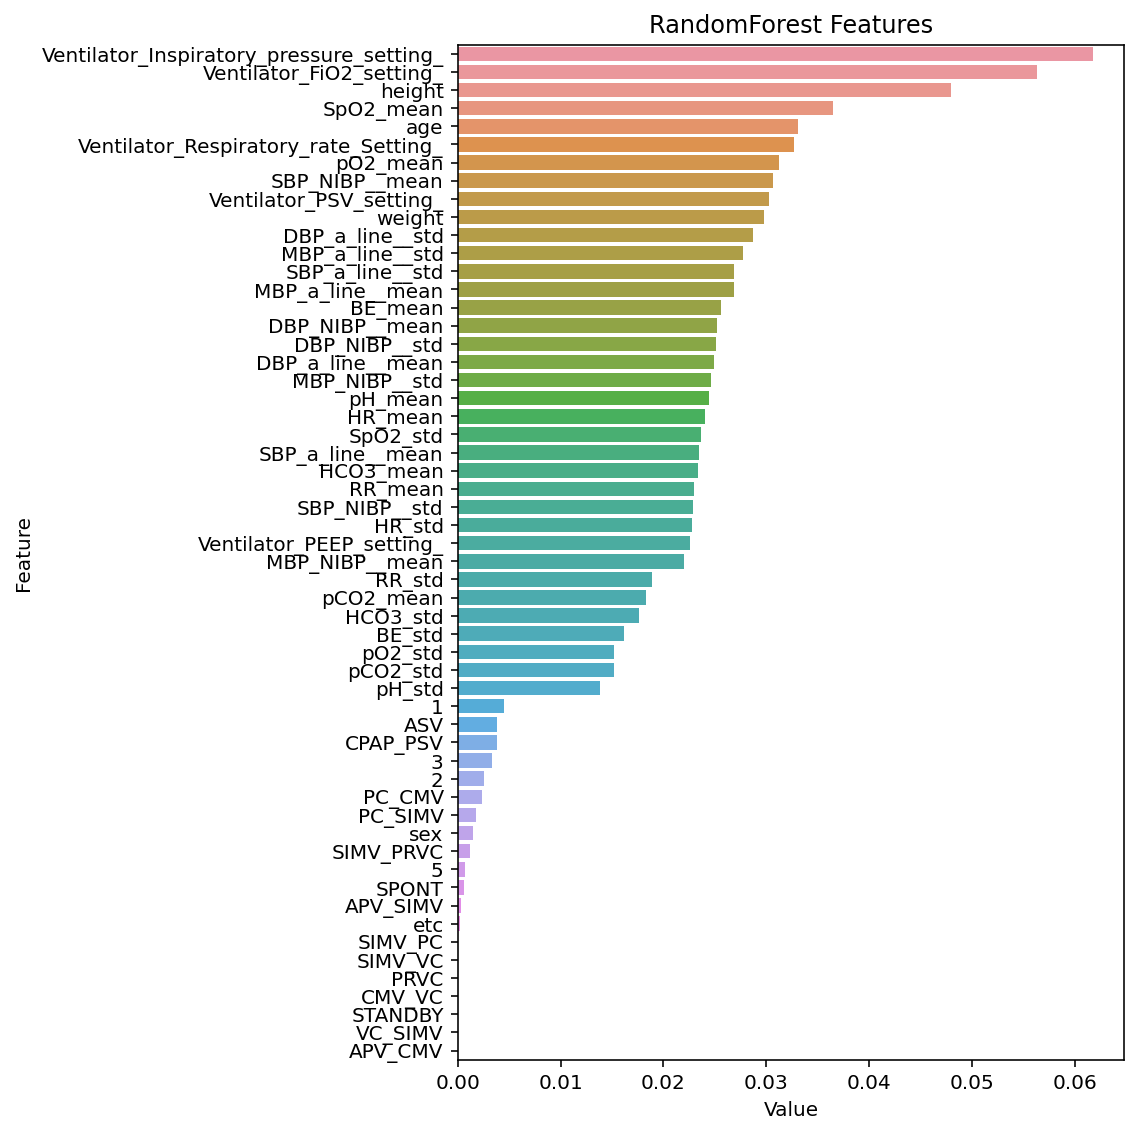

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, train_x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(8, 8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RandomForest Features')
plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances-01.png')

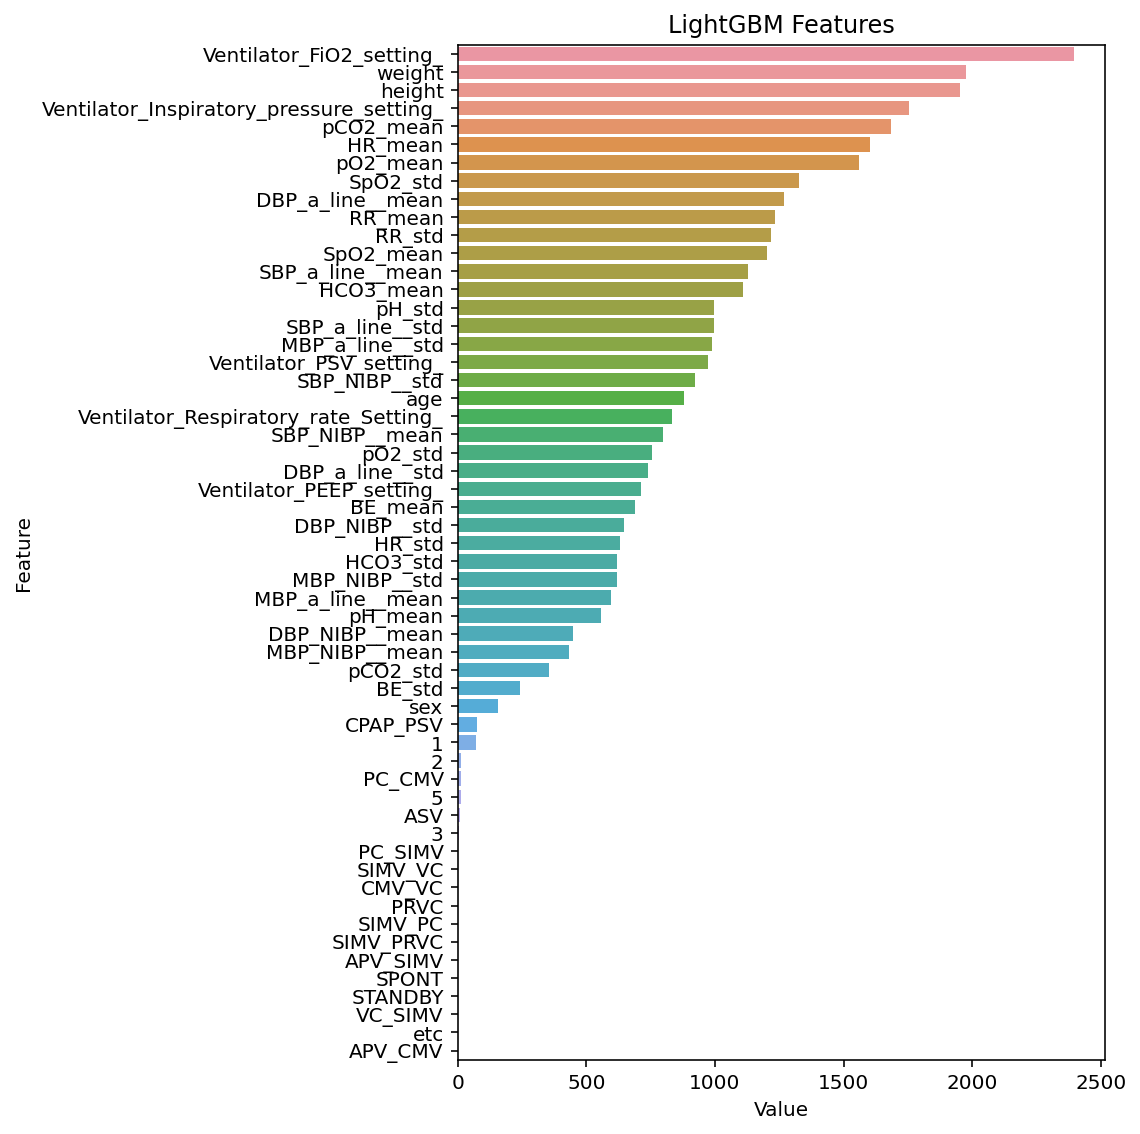

<Figure size 432x288 with 0 Axes>

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, train_x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(8, 8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

# Feature Importance 높은거만 사용한 모델

In [125]:
features = list(feature_imp.sort_values(by="Value", ascending=False)['Feature'][:30])
features

['Ventilator_Inspiratory_pressure_setting_',
 'Ventilator_FiO2_setting_',
 'height',
 'SpO2_mean',
 'age',
 'Ventilator_Respiratory_rate_Setting_',
 'pO2_mean',
 'SBP_NIBP__mean',
 'Ventilator_PSV_setting_',
 'weight',
 'DBP_a_line__std',
 'MBP_a_line__std',
 'SBP_a_line__std',
 'MBP_a_line__mean',
 'BE_mean',
 'DBP_NIBP__mean',
 'DBP_NIBP__std',
 'DBP_a_line__mean',
 'MBP_NIBP__std',
 'pH_mean',
 'HR_mean',
 'SpO2_std',
 'SBP_a_line__mean',
 'HCO3_mean',
 'RR_mean',
 'SBP_NIBP__std',
 'HR_std',
 'Ventilator_PEEP_setting_',
 'MBP_NIBP__mean',
 'RR_std']

In [128]:
# lgbm
from lightgbm import LGBMClassifier


train_x = train_imputed[features]
test_x = test_imputed[features]

clf = RandomForestClassifier(n_estimators=150, max_depth=11,random_state=0)
clf.fit(train_x,train_y)

# clf = LGBMClassifier(n_estimators=1500, num_leaves=31, boosting_type='gbdt', metric='binary_logloss',
                    # learning_rate=0.01, objective='binary')
# clf.fit(X=train_x, y=train_y)

y_prob = clf.predict_proba(test_x)
y_prob2 = y_prob[:,1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_prob2)

pred_positive_label = clf.predict_proba(test_x)[:,1]
y_prediction = clf.predict(test_x)
fprs, tprs, threshold = roc_curve(test_y, pred_positive_label)
y_prediction = np.where(clf.predict_proba(test_x)[:,1] > 0.1, 1, 0)

roc_score = auc(fprs, tprs)
prc = average_precision_score(test_y, pred_positive_label)
accuracy = accuracy_score(test_y, y_prediction)
prec = precision_score(test_y, y_prediction)
rec = recall_score(test_y, y_prediction)
f1 = f1_score(test_y, y_prediction)
CM = confusion_matrix(test_y, y_prediction)
TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
sen = TP/(TP+FN)
spe = TN/(TN+FP)

print('AUROC: ', round(roc_score,3))
print('AUPRC: ',  round(prc,3))
print('Accuracy: ',  round(accuracy,3))
print('Precision: ',  round(prec,3))
print('Recall: ',  round(rec,3))
print('F1-score: ',  round(f1,3))
print('Sensitivity: ',  round(sen,3))
print('Spesificity: ',  round(spe,2))

AUROC:  0.764
AUPRC:  0.187
Accuracy:  0.76
Precision:  0.174
Recall:  0.714
F1-score:  0.28
Sensitivity:  0.714
Spesificity:  0.76


# Random sampling 5번해서 성능 측정 (CI 포함)

In [ ]:
import random

success_group = list(set(dataset[dataset['label']==0]['pid']))
fail_group = list(set(dataset[dataset['label']==1]['pid']))

for i in range(0, 5):
    random.seed(i)

    train_suc = random.sample(success_group, int(len(success_group)*0.8))
    train_fail = random.sample(fail_group, 4)

    # Trainset
    train_pid = train_suc + train_fail

    trainset = dataset[dataset['pid'].isin(train_pid)]
    trainset = trainset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    testset = dataset[~dataset['pid'].isin(train_pid)]
    testset = testset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '_', x))

    train_x = trainset.drop(['pid', 'label'], axis=1)
    train_y = trainset['label']

    test_x = testset.drop([ 'pid', 'label'], axis=1)
    test_y = testset['label']
    print(test_x)

# 연령별 분포 확인

In [1]:
import pandas as pd
# Demo data 정리
demo = pd.read_csv('./data/integrated_data/Demographic.csv', index_col=0)
demo['birth'] = demo['birth_date'].str[:4]
demo['adm'] = demo['hosp_adm_date'].str[:4]
demo['age'] = demo['adm'].astype(int) - demo['birth'].astype(int) + 1
demo = demo[['patient_id', 'sex', 'age', 'icu_type', 'hosp_adm_date', 'hosp_discharge_date', 'icu_adm_date', 'icu_discharge_date', 'death_datetime']]
demo = demo[demo['age']>0]
demo

,patient_id,sex,age,icu_type,hosp_adm_date,hosp_discharge_date,icu_adm_date,icu_discharge_date,death_datetime
0,2,1,67,5,2021-08-02,2021-10-03,2021-08-02 12:10,2021-10-03 13:40,2021-10-03 10:52:00
1,3,1,69,1,2021-08-27,2021-09-13,2021-08-28 12:00,2021-09-13 13:00,2021-09-13 06:50:00
2,4,1,81,1,2021-09-07,2021-09-19,2021-09-07 18:02,2021-09-18 15:00,2021-09-19-01:19
3,5,0,43,2,2021-08-29,2021-11-13,2021-09-09 13:35,2021-10-07 17:24,NaN
4,6,1,75,1,2021-09-01,2021-09-28,2021-09-12 4:03,2021-09-23 15:10,NaN
...,...,...,...,...,...,...,...,...,...
148,2_245,1,41,2,2019-03-23,2019-05-07,2019-03-23,2019-04-19,NaN
149,2_248,1,41,2,2019-04-07,2019-06-07,2019-04-07,2019-04-24,NaN
150,2_249,0,30,2,2019-05-05,2019-05-23,2019-05-05,2019-05-17,NaN
151,2_251,1,46,2,2019-05-10,2019-05-21,2019-05-10,2019-05-22,2019-05-21 17:01:00


In [2]:
# 20세 미만 확인

demo[demo['age']<20]

,patient_id,sex,age,icu_type,hosp_adm_date,hosp_discharge_date,icu_adm_date,icu_discharge_date,death_datetime
88,2_122,1,19,2,2019-11-02,2019-12-04,2019-11-02,2019-11-12,NaN
111,2_156,1,19,2,2020-09-22,2020-10-20,2020-09-23,2020-09-29,NaN


In [3]:
# Age category화 함수 생성

def age_categorize(age):
    age = (age//10) * 10

    return age

In [4]:
demo['age'] = demo['age'].apply(age_categorize)
demo['age']

0      60
1      60
2      80
3      40
4      70
       ..
148    40
149    40
150    30
151    40
152    60
Name: age, Length: 530, dtype: int64

In [27]:
t1  = demo.groupby(by='age').count().reset_index()[['patient_id','age']]
t1

,patient_id,age
0,2,10
1,23,20
2,23,30
3,36,40
4,87,50
5,151,60
6,157,70
7,44,80
8,7,90


In [28]:
t1['patient_id'] = round((t1['patient_id']  / len(demo)) * 100, 3)
t1

,patient_id,age
0,0.377,10
1,4.340,20
2,4.340,30
3,6.792,40
4,16.415,50
5,28.491,60
6,29.623,70
7,8.302,80
8,1.321,90
